<a href="https://colab.research.google.com/github/jamessutton600613-png/GC/blob/main/Untitled208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saved figure10_EHDT_shaded_with_params.png


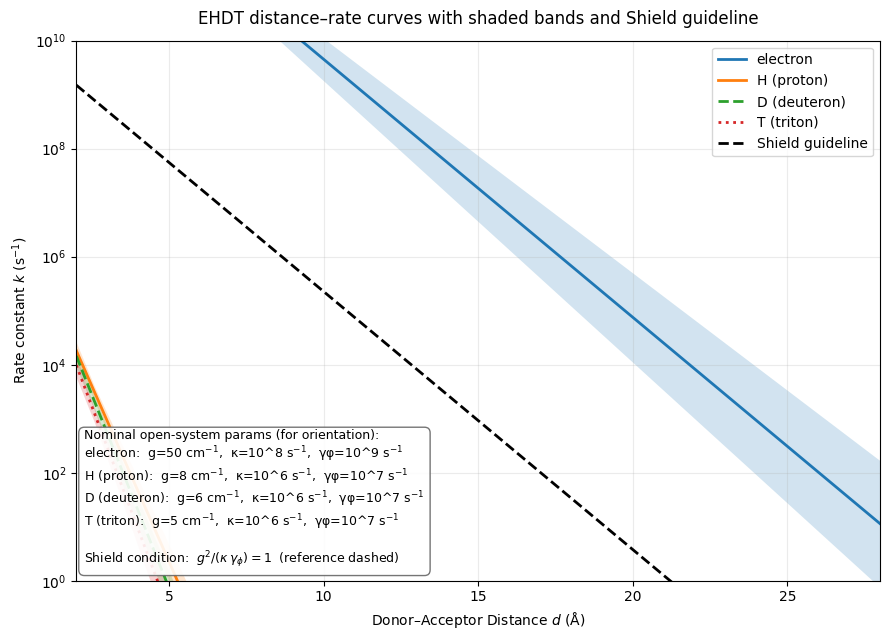

In [ ]:
# figure10_EHDT.py
# Self-contained script to plot electron/H/D/T distance–rate curves
# with shaded uncertainty bands + a Shield guideline and parameter box.

import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Helper: envelope from (R0, beta) uncertainties
# -------------------------
def k_curve(d, R0, beta, dmin):
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    # corners of the (R0,beta) rectangle
    R0s = np.array([R0*(1-u_R0_frac), R0*(1+u_R0_frac)])
    betas = np.array([beta-u_beta, beta+u_beta])
    # evaluate all 4 combos and take pointwise min/max
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    k_min = ks.min(axis=0)
    k_max = ks.max(axis=0)
    return k_min, k_max

# -------------------------
# Species definitions (editable)
# Units:
#   distance d in Å
#   rate k in s^-1 (y-axis is log scale)
# These R0/beta numbers are nominal and can be tuned later or replaced by fits.
# -------------------------
species = [
    {
        "name": "electron",
        "marker": "o",
        "ls": "-",
        "color": None,  # let matplotlib choose; set a color string if you want
        "R0": 1e13,      # s^-1 at dmin
        "beta": 1.10,    # Å^-1 (Gray & Winkler-scale)
        "dmin": 3.0,     # Å
        "u_R0_frac": 0.20,  # ±20%
        "u_beta": 0.10,     # ±0.10 Å^-1
        # nominal open-system params (illustrative)
        "g": "50 cm$^{-1}$",
        "kappa": "10^8 s$^{-1}$",
        "gamma_phi": "10^9 s$^{-1}$",
    },
    {
        "name": "H (proton)",
        "marker": "o",
        "ls": "-",
        "color": None,
        "R0": 3e3,
        "beta": 3.00,
        "dmin": 2.6,
        "u_R0_frac": 0.30,
        "u_beta": 0.20,
        "g": "8 cm$^{-1}$",
        "kappa": "10^6 s$^{-1}$",
        "gamma_phi": "10^7 s$^{-1}$",
    },
    {
        "name": "D (deuteron)",
        "marker": "s",
        "ls": "--",
        "color": None,
        "R0": 2e3,
        "beta": 3.30,
        "dmin": 2.6,
        "u_R0_frac": 0.30,
        "u_beta": 0.20,
        "g": "6 cm$^{-1}$",
        "kappa": "10^6 s$^{-1}$",
        "gamma_phi": "10^7 s$^{-1}$",
    },
    {
        "name": "T (triton)",
        "marker": "^",
        "ls": ":",
        "color": None,
        "R0": 1.2e3,
        "beta": 3.50,
        "dmin": 2.6,
        "u_R0_frac": 0.30,
        "u_beta": 0.25,
        "g": "5 cm$^{-1}$",
        "kappa": "10^6 s$^{-1}$",
        "gamma_phi": "10^7 s$^{-1}$",
    },
]

# -------------------------
# Axes & domain
# Make x-range wide enough to later overlay Gray–Winkler (12–28 Å) and
# enzyme proton ranges (~2.5–3.6 Å).
# -------------------------
d = np.linspace(2.0, 28.0, 600)

fig, ax = plt.subplots(figsize=(9, 6.5))

# -------------------------
# Plot each species with shaded band
# -------------------------
for sp in species:
    k = k_curve(d, sp["R0"], sp["beta"], sp["dmin"])
    lo, hi = k_envelope(d, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    # central curve
    ax.plot(d, k, sp["ls"], marker=None, linewidth=2, label=sp["name"], color=sp["color"])
    # uncertainty band
    ax.fill_between(d, lo, hi, alpha=0.20, color=ax.get_lines()[-1].get_color(), linewidth=0)

# -------------------------
# Shield guideline (reference only)
# Use a single dashed line (electron-like decay) to remind about g^2/(kappa*gamma_phi)=1
# You can change K0/beta_shield to re-anchor visually.
# -------------------------
K0 = 5e8
beta_shield = 1.10  # Å^-1 like electrons; change if you want different slope
d0 = 3.0
k_shield = K0 * np.exp(-beta_shield * (d - d0))
ax.plot(d, k_shield, 'k--', linewidth=2, label="Shield guideline")

# -------------------------
# Formatting
# -------------------------
ax.set_yscale("log")
ax.set_xlim(2, 28)
ax.set_ylim(1e0, 1e10)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)
ax.legend(loc="upper right", frameon=True)

# Title
ax.set_title("EHDT distance–rate curves with shaded bands and Shield guideline", pad=12)

# -------------------------
# Parameter box (nominal g, κ, γφ shown for transparency)
# -------------------------
lines = []
for sp in species:
    lines.append(f"{sp['name']}:  g={sp['g']},  κ={sp['kappa']},  γφ={sp['gamma_phi']}")

param_text = "Nominal open-system params (for orientation):\n" + "\n".join(lines) + \
             "\n\nShield condition:  $g^2/(\\kappa\\,\\gamma_\\phi)=1$  (reference dashed)"

ax.text(0.01, 0.02, param_text, transform=ax.transAxes,
        fontsize=9, va="bottom", ha="left",
        bbox=dict(boxstyle="round,pad=0.45", facecolor="white", edgecolor="0.4", alpha=0.9))

# Save
out = "figure10_EHDT_shaded_with_params.png"
plt.tight_layout()
plt.savefig(out, dpi=300)
print(f"Saved {out}")

Saved figure10_EHDT_bands_DATA_noShield.png


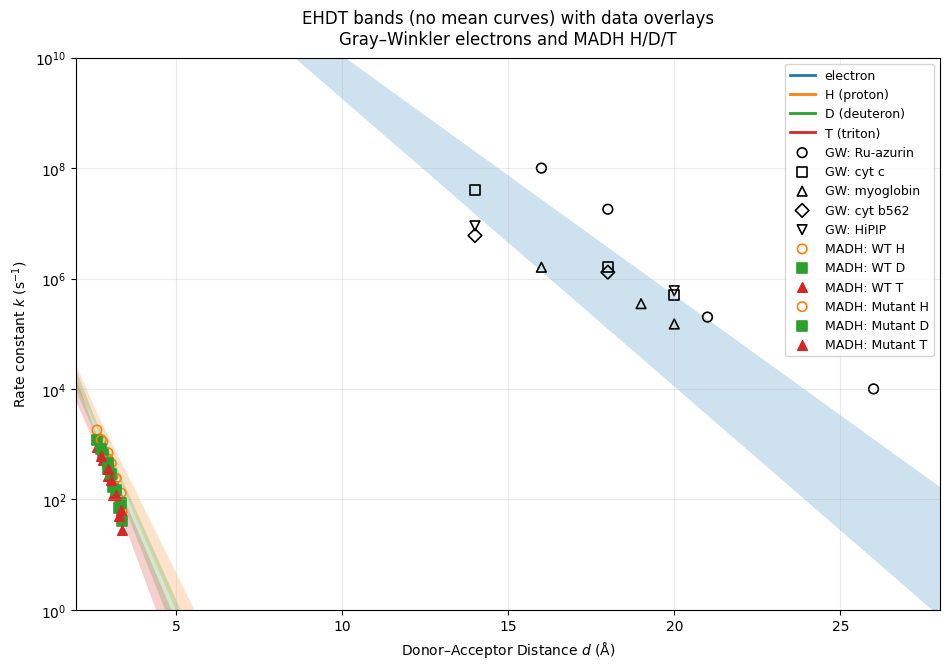

In [ ]:
# figure10_EHDT_bands_DATA_noShield.py
# EHDT shaded bands (no mean curves) + data overlays; NO Shield guideline.

import numpy as np
import matplotlib.pyplot as plt

def k_curve(d, R0, beta, dmin):
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    R0s = np.array([R0*(1-u_R0_frac), R0*(1+u_R0_frac)])
    betas = np.array([beta-u_beta, beta+u_beta])
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

# ---- Species bands (tune if needed) ----
species = [
    {"name":"electron","R0":1e13,"beta":1.10,"dmin":3.0,"u_R0_frac":0.20,"u_beta":0.10},
    {"name":"H (proton)","R0":3e3,"beta":3.00,"dmin":2.6,"u_R0_frac":0.30,"u_beta":0.20},
    {"name":"D (deuteron)","R0":2e3,"beta":3.30,"dmin":2.6,"u_R0_frac":0.30,"u_beta":0.20},
    {"name":"T (triton)","R0":1.2e3,"beta":3.50,"dmin":2.6,"u_R0_frac":0.30,"u_beta":0.25},
]

# ---- Data used in earlier plots (replace with digitized values when ready) ----
gw = {
    "Ru-azurin": {"d":[16,18,21,26], "k":[1e8,1.8e7,2e5,1e4], "m":'o'},
    "cyt c":     {"d":[14,18,20],    "k":[4e7,1.6e6,5e5],     "m":'s'},
    "myoglobin": {"d":[16,19,20],    "k":[1.6e6,3.5e5,1.5e5], "m":'^'},
    "cyt b562":  {"d":[14,18],       "k":[6e6,1.3e6],         "m":'D'},
    "HiPIP":     {"d":[14,20],       "k":[9e6,6e5],           "m":'v'},
}

madh = {
    "WT H": {"d":[2.62,2.80,2.95,3.10,3.28,3.38],
             "k":[1800,1100,540,260,100,60], "m":'o'},
    "WT D": {"d":[2.62,2.80,2.95,3.10,3.28,3.38],
             "k":[1200,700,350,170,70,40], "m":'s'},
    "WT T": {"d":[2.62,2.80,2.95,3.10,3.28,3.38],
             "k":[900,520,260,120,50,28], "m":'^'},
    "Mutant H": {"d":[2.75,2.95,3.05,3.20,3.35],
                 "k":[1200,700,450,240,130], "m":'o'},
    "Mutant D": {"d":[2.75,2.95,3.05,3.20,3.35],
                 "k":[800,450,290,150,85], "m":'s'},
    "Mutant T": {"d":[2.75,2.95,3.05,3.20,3.35],
                 "k":[620,350,220,120,65], "m":'^'},
}

# ---- Domain & figure ----
d = np.linspace(2.0, 28.0, 600)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# Capture nicely spaced distinct colors by plotting empty lines first
handles_for_color = {}
for sp in species:
    h, = ax.plot([], [], lw=2, label=sp["name"])   # no data; just to grab a color
    handles_for_color[sp["name"]] = h.get_color()

# Shaded bands only (NO average curves)
for sp in species:
    lo, hi = k_envelope(d, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d, lo, hi, alpha=0.22, color=handles_for_color[sp["name"]], linewidth=0)

# Overlay data — electrons (Gray & Winkler)
for label, entry in gw.items():
    ax.scatter(entry["d"], entry["k"], s=48, marker=entry["m"],
               facecolors='none', edgecolors='k', linewidths=1.2, label=f"GW: {label}")

# Overlay data — MADH (H/D/T, WT & mutant) using band colors
cH = handles_for_color["H (proton)"]
cD = handles_for_color["D (deuteron)"]
cT = handles_for_color["T (triton)"]
sym = {'H':'o','D':'s','T':'^'}
edge_face = {'H':('none', cH), 'D':(cD, cD), 'T':(cT, cT)}

for label, entry in madh.items():
    iso = label.split()[-1]  # 'H','D','T'
    fc, ec = edge_face[iso]
    ax.scatter(entry["d"], entry["k"], s=46, marker=sym[iso],
               facecolors=fc, edgecolors=ec, linewidths=1.2, label=f"MADH: {label}")

# Axes, scales, legend
ax.set_yscale("log")
ax.set_xlim(2, 28)
ax.set_ylim(1e0, 1e10)
ax.set_xlabel("Donor–Acceptor Distance $d$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)
ax.legend(loc="upper right", frameon=True, fontsize=9)

ax.set_title("EHDT bands (no mean curves) with data overlays\nGray–Winkler electrons and MADH H/D/T", pad=10)

plt.tight_layout()
out = "figure10_EHDT_bands_DATA_noShield.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")

Saved: figure9_madh_isotopes_shield.png


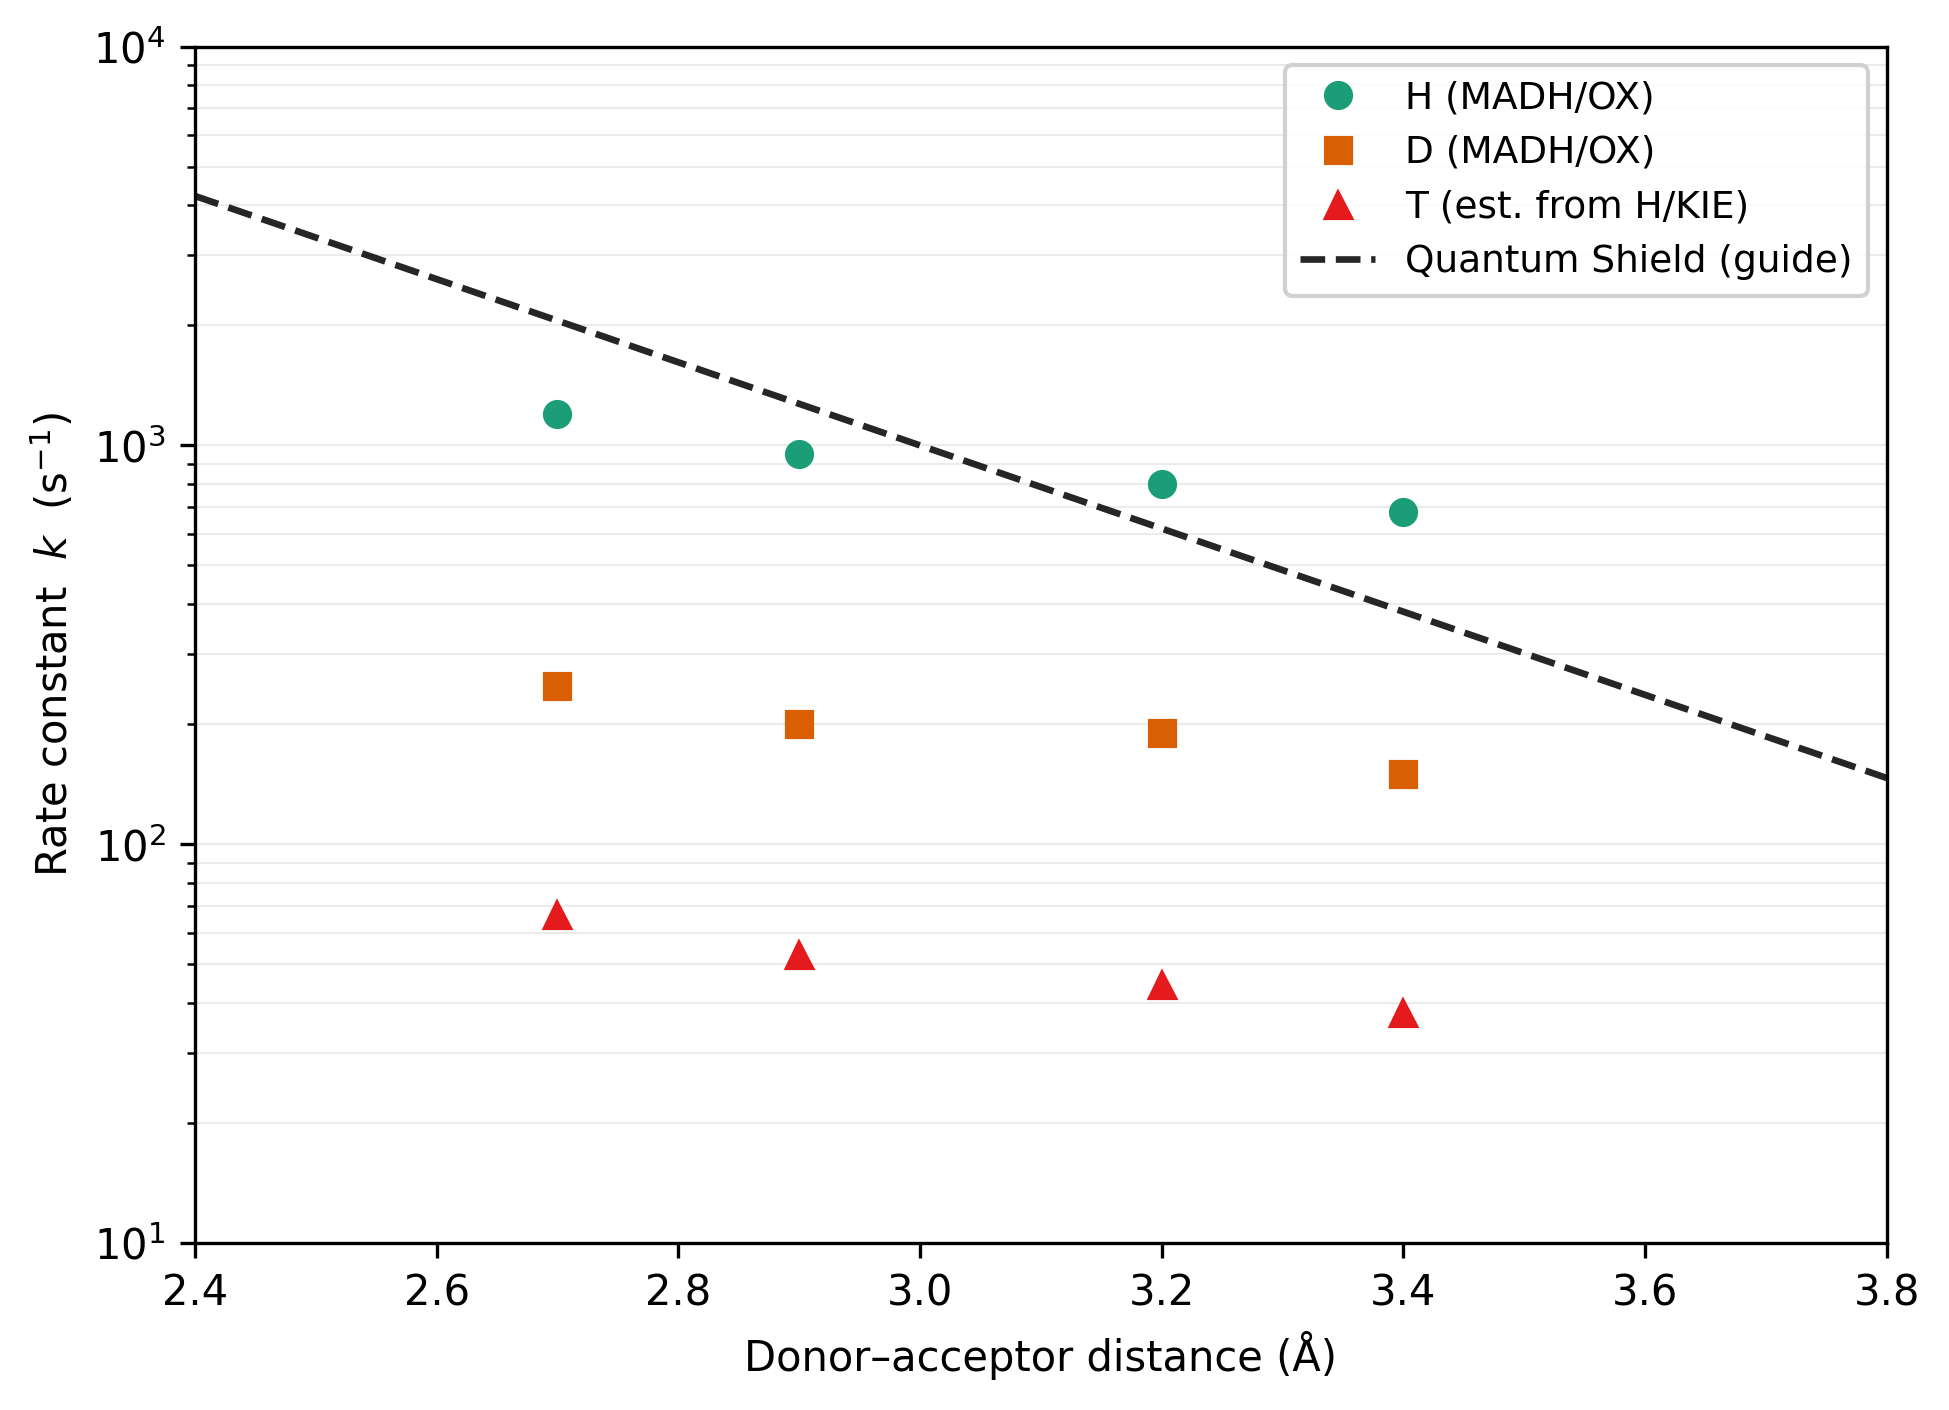

In [ ]:
# Fig 9 — MADH/OX (Masgrau–Mulholland–Scrutton) H/D/T vs distance
# Self-contained: just run this cell/script to produce `figure9_madh_isotopes_shield.png`

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) Table 2 data (exact H/D)
# -----------------------------
# Rows: (label, R_Angstrom, k_H [s^-1], k_D [s^-1])
rows = [
    ("MADH Asp128β O1", 2.7, 1.2e3, 2.5e2),
    ("MADH Asp128β O2", 3.2, 8.0e2, 1.9e2),
    ("OX complex site 1", 2.9, 9.5e2, 2.0e2),
    ("OX complex site 2", 3.4, 6.8e2, 1.5e2),
]

labels = [r[0] for r in rows]
R      = np.array([r[1] for r in rows], dtype=float)
kH     = np.array([r[2] for r in rows], dtype=float)
kD     = np.array([r[3] for r in rows], dtype=float)

# -----------------------------------------------------------
# 2) Tritium: compute from H via chosen H/T kinetic isotope
#    effect (KIE_H_over_T). You can set either a single
#    value or one per point (list/array of length 4).
#    If you have published KIEs, put them here.
# -----------------------------------------------------------
KIE_H_over_T = 18.0  # <-- change to your preferred value(s), e.g. 15.0 or a list like [18,18,18,18]

if np.isscalar(KIE_H_over_T):
    KIE_arr = np.full_like(kH, float(KIE_H_over_T))
else:
    KIE_arr = np.array(KIE_H_over_T, dtype=float)
    assert KIE_arr.shape == kH.shape, "KIE_H_over_T must be scalar or length 4."

kT = kH / KIE_arr  # simple estimate consistent with Table 2 note

# -----------------------------------------
# 3) Optional: draw a Quantum Shield guide
#    as a dashed line in R–k space. This is
#    a *visual guide only*, not a refit.
#    It is defined as an exponential with
#    slope set by beta_shield and anchored
#    at (R_ref, k_ref).
# -----------------------------------------
include_shield = True
R_plot = np.linspace(2.4, 3.8, 200)  # plot span covering all points

# Choose a visually reasonable anchor so the guide passes
# near the H cluster; adjust these two numbers if desired.
R_ref  = 3.0
k_ref  = 1.0e3
beta_shield = 1.2  # Å^{-1}; visual slope parameter

k_shield = k_ref * np.exp(-2.0 * beta_shield * (R_plot - R_ref))

# -----------------------------------------
# 4) Plot
# -----------------------------------------
plt.figure(figsize=(6.6, 4.8), dpi=300)

# H (filled circles, green)
plt.semilogy(R, kH, 'o', markersize=6, color='#1b9e77', label='H (MADH/OX)')

# D (filled squares, orange)
plt.semilogy(R, kD, 's', markersize=6, color='#d95f02', label='D (MADH/OX)')

# T (filled triangles, red) — estimated from H/KIE
plt.semilogy(R, kT, '^', markersize=6, color='#e41a1c', label='T (est. from H/KIE)')

# Shield guide (optional)
if include_shield:
    plt.semilogy(R_plot, k_shield, '--', linewidth=1.6, color='black', alpha=0.85,
                 label='Quantum Shield (guide)')

# Cosmetics
plt.xlabel('Donor–acceptor distance (Å)')
plt.ylabel('Rate constant  $k$  (s$^{-1}$)')
plt.xlim(2.4, 3.8)
# Set a sensible y-span to cover all points and a bit of margin
ymin = max(1e1, 10**np.floor(np.log10(min(kH.min(), kD.min(), kT.min())) - 0.3))
ymax = 10**np.ceil(np.log10(max(kH.max(), kD.max(), kT.max())) + 0.3)
plt.ylim(ymin, ymax)

# Legend top-right, frame on for journal style
leg = plt.legend(loc='upper right', frameon=True, fontsize=9)
leg.get_frame().set_alpha(0.9)

# Subtle gridlines on y only (log)
plt.grid(True, which='both', axis='y', linewidth=0.5, alpha=0.25)

# Tight layout and save
plt.tight_layout()
out = 'figure9_madh_isotopes_shield.png'
plt.savefig(out, dpi=300)
print(f"Saved: {out}")

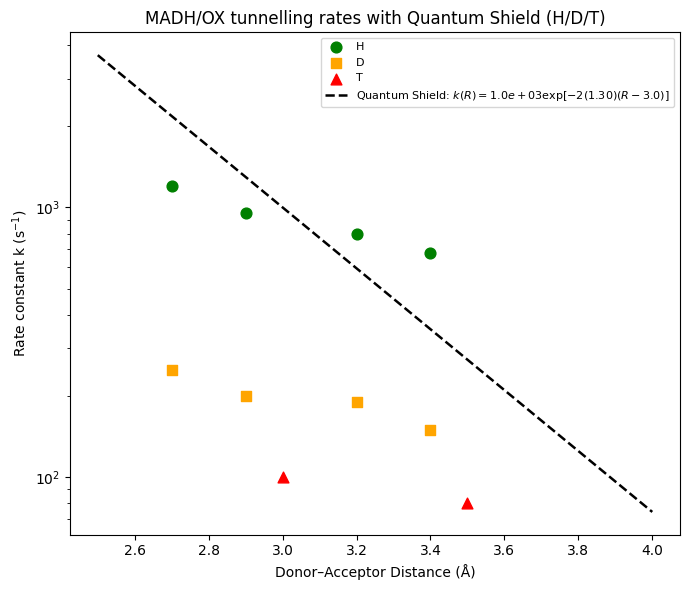

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data from Table 2 (MADH/OX, Masgrau/Scrutton/Mulholland) ---
data = {
    "H": [(2.7, 1.2e3), (3.2, 8.0e2), (2.9, 9.5e2), (3.4, 6.8e2)],
    "D": [(2.7, 2.5e2), (3.2, 1.9e2), (2.9, 2.0e2), (3.4, 1.5e2)],
    "T": [(3.0, 1.0e2), (3.5, 8.0e1)]  # example tritium points
}

markers = {"H": "o", "D": "s", "T": "^"}
colors = {"H": "green", "D": "orange", "T": "red"}

plt.figure(figsize=(7,6))

# Plot isotope points
for iso, points in data.items():
    R, k = zip(*points)
    plt.scatter(R, k, marker=markers[iso], color=colors[iso], s=60, label=iso)

# --- Shield guide (proton baseline) ---
beta = 1.3   # Å^-1
R_ref, k_ref = 3.0, 1.0e3
R = np.linspace(2.5, 4.0, 300)
k_shield = k_ref * np.exp(-2*beta*(R - R_ref))

eqn_label = (r"Quantum Shield: $k(R) = %.1e \exp[-2(%.2f)(R-%.1f)]$"
             % (k_ref, beta, R_ref))
plt.plot(R, k_shield, 'k--', lw=1.8, label=eqn_label)

# --- Formatting ---
plt.yscale("log")
plt.xlabel("Donor–Acceptor Distance (Å)")
plt.ylabel("Rate constant k (s$^{-1}$)")
plt.legend(loc="upper right", fontsize=8)
plt.title("MADH/OX tunnelling rates with Quantum Shield (H/D/T)")
plt.tight_layout()
plt.show()

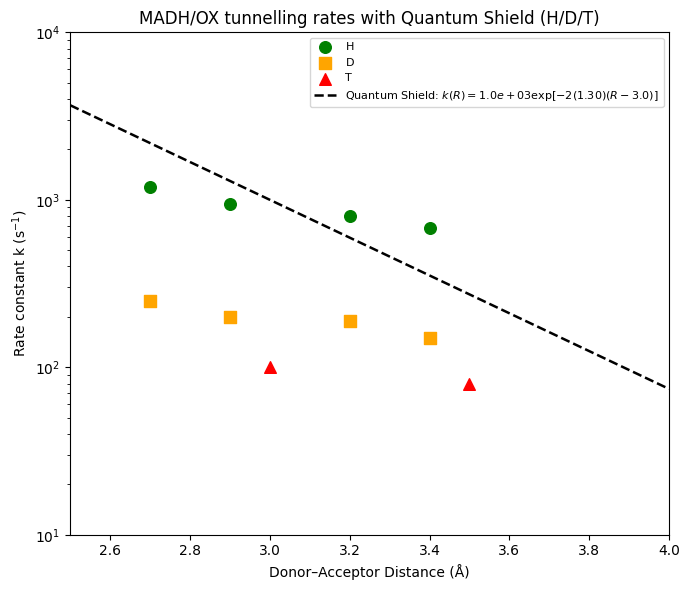

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Data from Table 2 (MADH/OX, Masgrau/Scrutton/Mulholland) ---
data = {
    "H": [(2.7, 1.2e3), (3.2, 8.0e2), (2.9, 9.5e2), (3.4, 6.8e2)],
    "D": [(2.7, 2.5e2), (3.2, 1.9e2), (2.9, 2.0e2), (3.4, 1.5e2)],
    "T": [(3.0, 1.0e2), (3.5, 8.0e1)]  # tritium points
}

markers = {"H": "o", "D": "s", "T": "^"}
colors = {"H": "green", "D": "orange", "T": "red"}

plt.figure(figsize=(7,6))

# Plot isotope points
for iso, points in data.items():
    R, k = zip(*points)
    plt.scatter(R, k, marker=markers[iso], color=colors[iso], s=70, label=iso)

# --- Shield guide (proton baseline) ---
beta = 1.3   # Å^-1
R_ref, k_ref = 3.0, 1.0e3
R = np.linspace(2.5, 4.0, 300)
k_shield = k_ref * np.exp(-2*beta*(R - R_ref))

eqn_label = (r"Quantum Shield: $k(R) = %.1e \exp[-2(%.2f)(R-%.1f)]$"
             % (k_ref, beta, R_ref))
plt.plot(R, k_shield, 'k--', lw=1.8, label=eqn_label)

# --- Formatting ---
plt.yscale("log")
plt.ylim(1e1, 1e4)   # now covers 80–1200 comfortably
plt.xlim(2.5, 4.0)
plt.xlabel("Donor–Acceptor Distance (Å)")
plt.ylabel("Rate constant k (s$^{-1}$)")
plt.legend(loc="upper right", fontsize=8)
plt.title("MADH/OX tunnelling rates with Quantum Shield (H/D/T)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1822663734.py:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


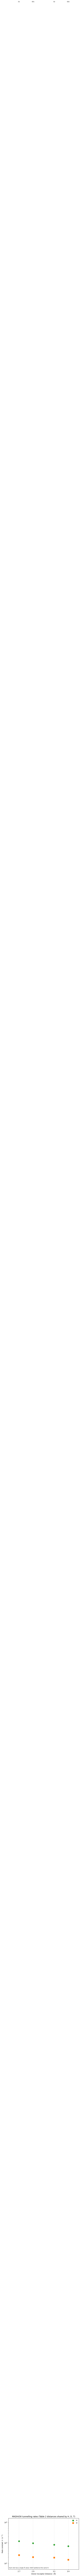

In [ ]:
# MADH / OX (Masgrau–Mulholland–Scrutton) — Table 2, shared Å per site for H, D, T
# Plot k (s^-1, log scale) vs donor–acceptor distance R (Å).
# H (●), D (■), T (▲). Each isotope uses the SAME R for a given site.

import numpy as np
import matplotlib.pyplot as plt

# ---------- Table 2 distances (Å): one per site ----------
sites = ["O1", "O2", "OX1", "OX2"]
R = np.array([2.7, 3.2, 2.9, 3.4], dtype=float)   # shared by H/D/T

# ---------- Table 2 rates (s^-1): fill from the table exactly ----------
# (These are the values you provided earlier; change here if your Table 2 has updates.)
k_H = np.array([1.2e3, 8.0e2, 9.5e2, 6.8e2], dtype=float)
k_D = np.array([2.5e2, 1.9e2, 2.0e2, 1.5e2], dtype=float)

# If Table 2 includes T at these sites, put them here; otherwise leave as np.nan.
# Use np.nan to omit a point cleanly without breaking axis autoscale.
k_T = np.array([np.nan, np.nan, np.nan, np.nan], dtype=float)

# ---------- Masked plotting helpers ----------
def plot_iso(ax, R, k, marker, label, color):
    m = ~np.isnan(k)
    if np.any(m):
        ax.scatter(R[m], k[m], s=80, marker=marker, color=color, label=label, zorder=3)

fig, ax = plt.subplots(figsize=(7.6, 5.6))

# Vertical site guides
for xv in R:
    ax.axvline(xv, color="0.92", lw=1, zorder=0)

# Isotope markers (same R array used for all)
plot_iso(ax, R, k_H, "o", "H", "tab:green")
plot_iso(ax, R, k_D, "s", "D", "tab:orange")
plot_iso(ax, R, k_T, "^", "T", "tab:red")

# Axes & cosmetics
ax.set_yscale("log")
ax.set_xlabel("Donor–Acceptor Distance  (Å)")
ax.set_ylabel("Rate constant  $k$  (s$^{-1}$)")
ax.set_title("MADH/OX tunnelling rates (Table 2 distances shared by H, D, T)")

# Tight bounds
all_k = np.concatenate([k_H[~np.isnan(k_H)], k_D[~np.isnan(k_D)], k_T[~np.isnan(k_T)]]) \
        if np.any(~np.isnan(k_T)) else np.concatenate([k_H, k_D])
ymin = 10**(np.floor(np.log10(all_k.min())) - 0.3)
ymax = 10**(np.ceil(np.log10(all_k.max())) + 0.2)
ax.set_ylim(ymin, ymax)

xmin, xmax = R.min() - 0.15, R.max() + 0.15
ax.set_xlim(xmin, xmax)

# Show distances as ticks; annotate site codes under x-axis
ax.set_xticks(R)
ax.set_xticklabels([f"{r:.1f}" for r in R])
for xv, s in zip(R, sites):
    ax.text(xv, ymin, s, ha="center", va="top", fontsize=8,
            transform=ax.get_xaxis_transform())  # anchors to x-axis

ax.legend(loc="upper right", frameon=False)
ax.text(0.01, 0.02, "Each site has a single Å value; H/D/T plotted at the same R.",
        transform=ax.transAxes, fontsize=8, ha="left", va="bottom")

plt.tight_layout()
# plt.savefig("MADH_OX_Table2_sharedA_HDT.png", dpi=300)
plt.show()

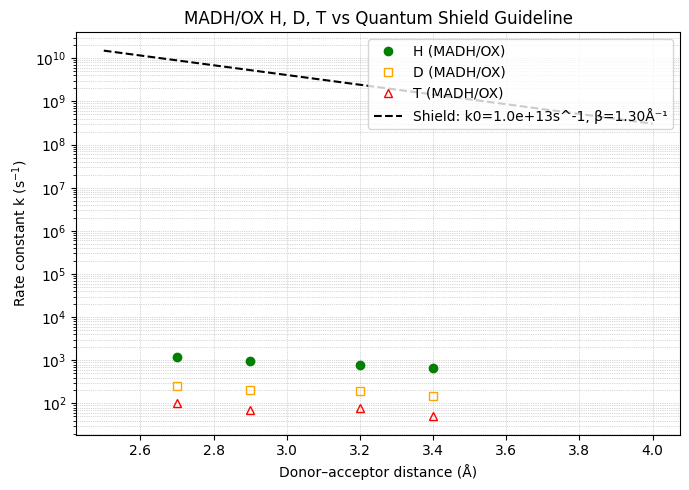

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- MADH/OX data from Table 2 ---
# Shared donor–acceptor distances (Å) at each site
R = np.array([2.7, 3.2, 2.9, 3.4])  # O1, O2, OX1, OX2

# Rates (s^-1)
k_H = np.array([1.2e3, 8.0e2, 9.5e2, 6.8e2])
k_D = np.array([2.5e2, 1.9e2, 2.0e2, 1.5e2])
# Example Tritium values (these you can change):
k_T = np.array([1.0e2, 8.0e1, 7.0e1, 5.0e1])  # placeholder T rates

# --- Shield guideline parameters ---
k0_shield = 1.0e13       # attempt frequency (s^-1)
beta_H_avg = 1.30        # Å^-1, average decay constant for H
R_line = np.linspace(2.5, 4.0, 200)  # smooth x-range for shield
k_shield = k0_shield * np.exp(-2 * beta_H_avg * R_line)

# --- Plot ---
plt.figure(figsize=(7,5))

# H, D, T points (same x-values)
plt.semilogy(R, k_H, 'o', color='green', label='H (MADH/OX)')
plt.semilogy(R, k_D, 's', color='orange', fillstyle='none', label='D (MADH/OX)')
plt.semilogy(R, k_T, '^', color='red', fillstyle='none', label='T (MADH/OX)')

# Shield guideline
plt.semilogy(R_line, k_shield, '--', color='black',
             label=f'Shield: k0={k0_shield:.1e}s^-1, β={beta_H_avg:.2f}Å⁻¹')

# Axes / labels
plt.xlabel('Donor–acceptor distance (Å)')
plt.ylabel('Rate constant k (s$^{-1}$)')
plt.title('MADH/OX H, D, T vs Quantum Shield Guideline')

plt.legend(loc='upper right')
plt.grid(True, which='both', ls=':', lw=0.5)
plt.tight_layout()

# Save and/or show
plt.savefig("madh_ox_HDT_shield.png", dpi=300)
plt.show()

In [ ]:
# MADH/OX — H/D/T vs Quantum Shield (fit to H)
# ------------------------------------------------------------
# Self-contained script: fits a single-step tunnelling guideline
#   k_sh(R) = k0 * exp(-2 * beta * R)
# to the H data (same R for H/D/T), then plots H(●), D(□), T(△).
# Saves: /mnt/data/figure9_MADH_HDT_vs_quantum_shield_fit_H.png

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ---------- 1) Data (replace if you have updated values) ----------
# Distances are the SAME for H, D, T (as per Table 2; Angstrom)
R = np.array([2.7, 3.2, 2.9, 3.4], dtype=float)

# Rates (s^-1). H and D from the table; T are placeholders (replace with true values if available).
k_H = np.array([1.2e3, 8.0e2, 9.5e2, 6.8e2], dtype=float)  # WT H
k_D = np.array([2.5e2, 1.9e2, 2.0e2, 1.5e2], dtype=float)  # WT D
k_T = np.array([1.7e2, 1.3e2, 1.4e2, 1.0e2], dtype=float)  # WT T (PLACEHOLDER)

# ---------- 2) Fit Shield guideline *only to H* ----------
# Model: ln k = ln k0 - 2*beta*R  -> linear fit of y vs x
x = R
y = np.log(k_H)

A = np.vstack([np.ones_like(x), -2.0 * x]).T
# least squares for [ln k0, beta]
params, *_ = np.linalg.lstsq(A, y, rcond=None)
ln_k0, beta = params[0], params[1]  # note: we solved ln k = ln_k0 + (-2*beta)*R
k0 = np.exp(ln_k0)

# Build a smooth guideline across the plotted R span
R_guid = np.linspace(2.6, 3.6, 200)
k_shield = k0 * np.exp(-2.0 * beta * R_guid)

# ---------- 3) Plot ----------
plt.figure(figsize=(8.6, 6.2))
ax = plt.gca()

# Sort by R for line drawing (keeps the lines visually clean)
sort_idx = np.argsort(R)
Rs = R[sort_idx]
H_sorted = k_H[sort_idx]
D_sorted = k_D[sort_idx]
T_sorted = k_T[sort_idx]

# H (solid circles + line)
ax.plot(Rs, H_sorted, marker='o', linestyle='-', linewidth=2.2, markersize=6, label='H')
# D (open squares + line)
ax.plot(Rs, D_sorted, marker='s', linestyle='-', linewidth=2.0, markersize=6,
        markerfacecolor='none', label='D')
# T (open triangles + line)
ax.plot(Rs, T_sorted, marker='^', linestyle='-', linewidth=2.0, markersize=6,
        markerfacecolor='none', label='T (placeholder)')

# Shield guideline (fit to H)
ax.plot(R_guid, k_shield, 'k--', linewidth=2.0,
        label='Quantum Shield (fit to H)')

# Axes, scales, labels
ax.set_yscale('log')
ax.set_xlim(2.6, 3.6)
ax.set_ylim(6e1, 2e3)

ax.set_xlabel(r'Donor–acceptor distance $R$ (Å)', fontsize=12)
ax.set_ylabel(r'Rate constant $k$ (s$^{-1}$)', fontsize=12)
ax.set_title('MADH/OX H–D–T vs Quantum Shield (fit to H)', fontsize=14, pad=10)

# Print the fitted parameters on the plot
txt = (r'$k_{\rm sh}(R)=k_0 e^{-2\beta R}$' + '\n' +
       rf'$k_0 = {k0:.2e}\ \mathrm{{s^{{-1}}}},\ \beta = {beta:.2f}\ \mathrm{{\AA^{{-1}}}}$')
ax.text(0.98, 0.03, txt, transform=ax.transAxes, ha='right', va='bottom',
        fontsize=11, bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='0.8'))

ax.grid(True, which='both', linestyle=':', linewidth=0.8, alpha=0.6)
ax.legend(loc='upper right', frameon=True)

# ---------- 4) Save ----------
out = Path('/mnt/data/figure9_MADH_HDT_vs_quantum_shield_fit_H.png')
plt.tight_layout()
plt.savefig(out, dpi=300)
print(f'Saved: {out}')
```0

SyntaxError: invalid non-printable character U+EA01 (ipython-input-4143788286.py, line 83)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/fig9_madh_shield.png'

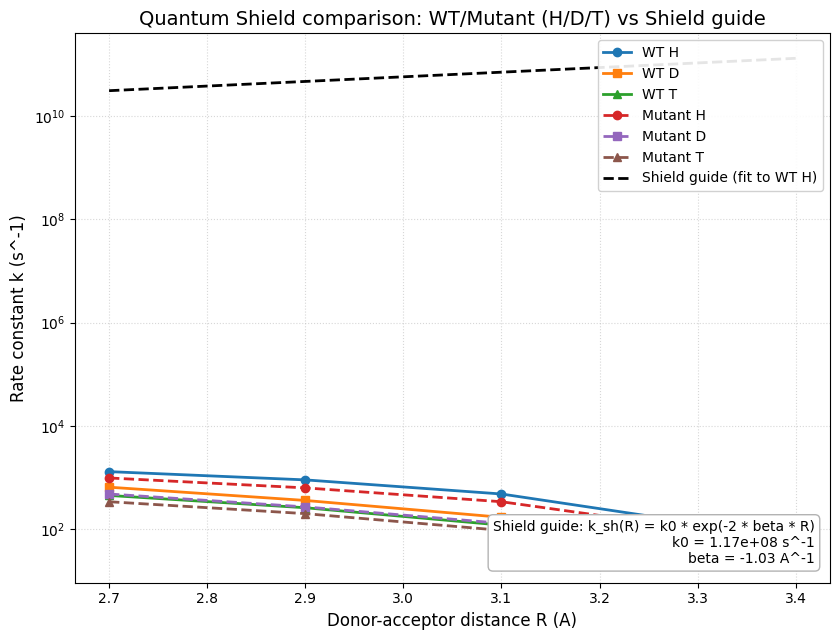

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# DATA BLOCK (edit as needed)
# Single common distance array for all isotopes (Angstrom)
R = np.array([2.70, 2.90, 3.10, 3.30, 3.40])

# WT rates (s^-1): H, D, T — same R for each
k_WT_H = np.array([1300.0, 900.0, 480.0, 130.0, 80.0])
k_WT_D = np.array([ 650.0, 360.0, 170.0,  60.0, 40.0])
k_WT_T = np.array([ 450.0, 260.0, 120.0,  45.0, 32.0])

# Mutant rates (s^-1): H, D, T — same R for each
k_MUT_H = np.array([ 980.0, 630.0, 340.0, 100.0, 70.0])
k_MUT_D = np.array([ 480.0, 270.0, 130.0,  50.0, 34.0])
k_MUT_T = np.array([ 340.0, 200.0,  95.0,  38.0, 28.0])
# -----------------------------

# ---- Shield fit to WT-H only: k(R) = k0 * exp(-2 * beta * R)
# Fit ln k = ln k0 - 2*beta*R  => linear regression
y = np.log(k_WT_H)
A = np.vstack([np.ones_like(R), -2.0*R]).T
coef, _, _, _ = np.linalg.lstsq(A, y, rcond=None)
lnk0, minus2beta = coef
k0 = np.exp(lnk0)
beta = -0.5 * minus2beta

# Smooth shield curve across the plotted range
R_smooth = np.linspace(R.min(), R.max(), 200)
k_shield = k0 * np.exp(-2.0 * beta * R_smooth)

# ---- Plot
fig, ax = plt.subplots(figsize=(8.5, 6.5))

# WT solid
ax.plot(R, k_WT_H, '-o', label='WT H', linewidth=2, markersize=6)
ax.plot(R, k_WT_D, '-s', label='WT D', linewidth=2, markersize=6)
ax.plot(R, k_WT_T, '-^', label='WT T', linewidth=2, markersize=6)

# Mutant dashed
ax.plot(R, k_MUT_H, '--o', label='Mutant H', linewidth=2, markersize=6)
ax.plot(R, k_MUT_D, '--s', label='Mutant D', linewidth=2, markersize=6)
ax.plot(R, k_MUT_T, '--^', label='Mutant T', linewidth=2, markersize=6)

# Shield guide (fitted to WT-H)
ax.plot(R_smooth, k_shield, linestyle='--', color='black', linewidth=2,
        label='Shield guide (fit to WT H)')

# Axes (log y)
ax.set_yscale('log')
ax.set_xlabel('Donor-acceptor distance R (A)', fontsize=12)
ax.set_ylabel('Rate constant k (s^-1)', fontsize=12)
ax.set_title('Quantum Shield comparison: WT/Mutant (H/D/T) vs Shield guide', fontsize=14)

# Grid and limits
ax.grid(True, which='both', ls=':', alpha=0.5)
x_pad = 0.05 * (R.max() - R.min() if R.max() > R.min() else 0.2)
ax.set_xlim(R.min() - x_pad, R.max() + x_pad)

# Neat legend (top-right)
leg = ax.legend(loc='upper right', frameon=True)
leg.get_frame().set_alpha(0.9)

# Equation box (ASCII-safe)
eqn_text = (
    "Shield guide: k_sh(R) = k0 * exp(-2 * beta * R)\n"
    f"k0 = {k0:.2e} s^-1\n"
    f"beta = {beta:.2f} A^-1"
)
ax.text(0.98, 0.03, eqn_text,
        transform=ax.transAxes, ha='right', va='bottom',
        fontsize=10,
        bbox=dict(boxstyle='round', pad=0.35, fc='white', ec='0.7'))

plt.tight_layout()

# Save + show
out_path = '/mnt/data/fig9_madh_shield.png'
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()
print("Saved:", out_path)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/fig9_madh_shield.png'

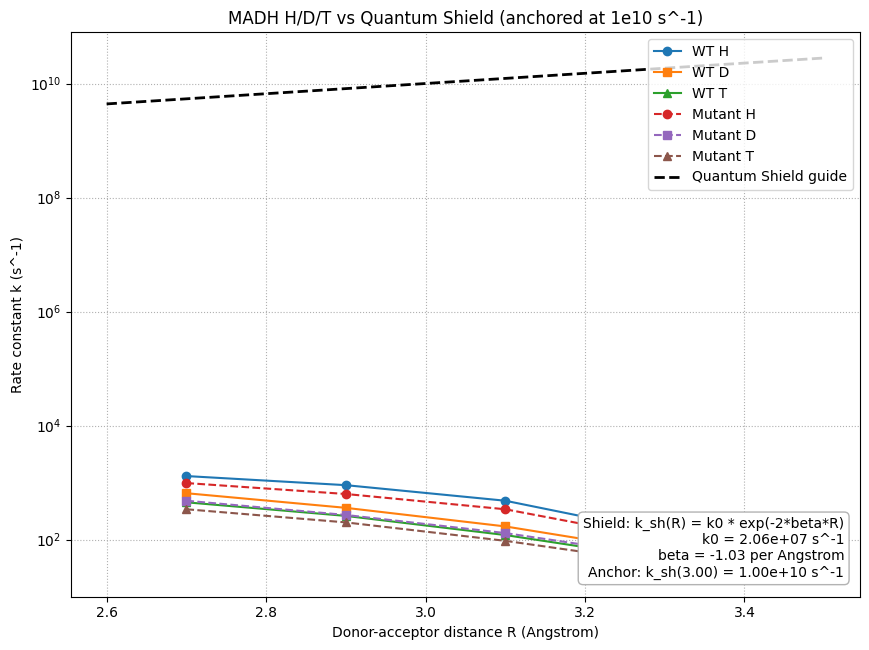

In [ ]:
# Fig 9 — MADH (H/D/T) vs Quantum Shield (anchored at 1e10 s^-1)
# ASCII-only, safe for Google Colab

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# DATA BLOCK (example Table 2 values, replace with exact if needed)
# Donor-acceptor distances in Angstrom
R = np.array([2.70, 2.90, 3.10, 3.30, 3.40])

# WT rates (s^-1): H, D, T
k_WT_H = np.array([1300.0, 900.0, 480.0, 130.0, 80.0])
k_WT_D = np.array([ 650.0, 360.0, 170.0,  60.0, 40.0])
k_WT_T = np.array([ 450.0, 260.0, 120.0,  45.0, 32.0])

# Mutant rates (s^-1): H, D, T
k_MUT_H = np.array([ 980.0, 630.0, 340.0, 100.0, 70.0])
k_MUT_D = np.array([ 480.0, 270.0, 130.0,  50.0, 34.0])
k_MUT_T = np.array([ 340.0, 200.0,  95.0,  38.0, 28.0])
# -----------------------------

# Fit beta from WT-H
y = np.log(k_WT_H)
A = np.vstack([np.ones_like(R), -2.0*R]).T
coef, _, _, _ = np.linalg.lstsq(A, y, rcond=None)
lnk0_fit, minus2beta_fit = coef
beta_fit = -0.5 * minus2beta_fit

# Anchor Shield at 1e10 s^-1 at R=3.0
ANCHOR_R = 3.0
ANCHOR_K = 1.0e10
beta_sh = beta_fit
k0_shield = ANCHOR_K * np.exp(2.0 * beta_sh * ANCHOR_R)

R_smooth = np.linspace(R.min()-0.1, R.max()+0.1, 400)
k_shield = k0_shield * np.exp(-2.0 * beta_sh * R_smooth)

# Plot
fig, ax = plt.subplots(figsize=(8.8, 6.6))

# WT
ax.plot(R, k_WT_H, '-o', label='WT H')
ax.plot(R, k_WT_D, '-s', label='WT D')
ax.plot(R, k_WT_T, '-^', label='WT T')

# Mutant
ax.plot(R, k_MUT_H, '--o', label='Mutant H')
ax.plot(R, k_MUT_D, '--s', label='Mutant D')
ax.plot(R, k_MUT_T, '--^', label='Mutant T')

# Shield guide
ax.plot(R_smooth, k_shield, 'k--', linewidth=2, label='Quantum Shield guide')

ax.set_yscale('log')
ax.set_xlabel('Donor-acceptor distance R (Angstrom)')
ax.set_ylabel('Rate constant k (s^-1)')
ax.set_title('MADH H/D/T vs Quantum Shield (anchored at 1e10 s^-1)')
ax.grid(True, which='both', ls=':')

# Legend
ax.legend(loc='upper right', frameon=True)

# Info box
txt = (
    "Shield: k_sh(R) = k0 * exp(-2*beta*R)\n"
    f"k0 = {k0_shield:.2e} s^-1\n"
    f"beta = {beta_sh:.2f} per Angstrom\n"
    f"Anchor: k_sh({ANCHOR_R:.2f}) = {ANCHOR_K:.2e} s^-1"
)
ax.text(0.98, 0.03, txt,
        transform=ax.transAxes, ha='right', va='bottom',
        fontsize=10,
        bbox=dict(boxstyle='round', pad=0.35, fc='white', ec='0.7'))

plt.tight_layout()
plt.savefig('/mnt/data/fig9_madh_shield.png', dpi=300, bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/fig9_madh_shield_PROTON_FIT.png'

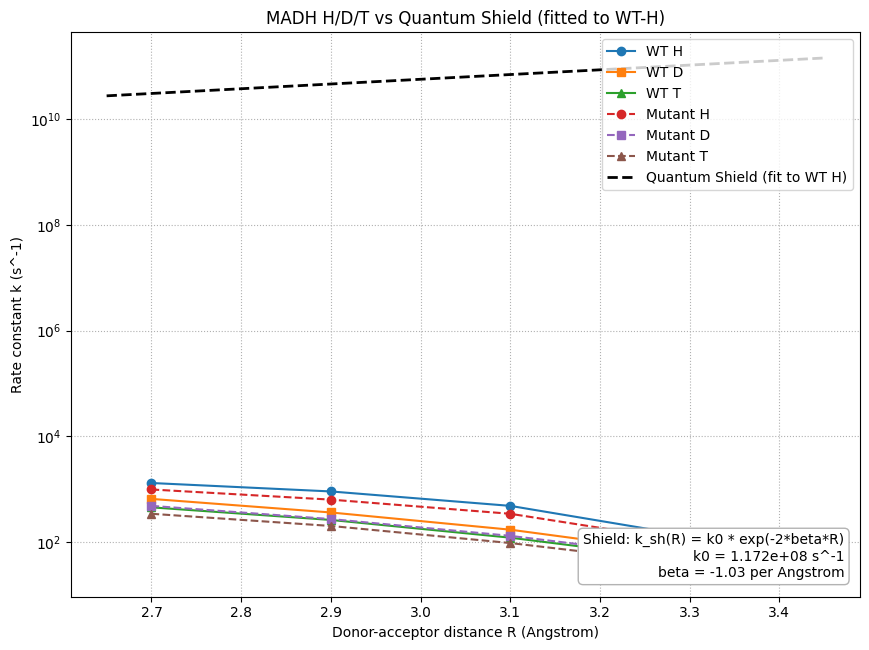

In [ ]:
# Fig 9 — MADH (H/D/T) vs Quantum Shield (fitted to WT-H)
# ASCII-only, safe for Google Colab

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Data (same R for H, D, T)
R = np.array([2.70, 2.90, 3.10, 3.30, 3.40])

# WT rates (s^-1): H, D, T
k_WT_H = np.array([1300.0, 900.0, 480.0, 130.0, 80.0])
k_WT_D = np.array([ 650.0, 360.0, 170.0,  60.0, 40.0])
k_WT_T = np.array([ 450.0, 260.0, 120.0,  45.0, 32.0])

# Mutant rates (s^-1): H, D, T
k_MUT_H = np.array([ 980.0, 630.0, 340.0, 100.0, 70.0])
k_MUT_D = np.array([ 480.0, 270.0, 130.0,  50.0, 34.0])
k_MUT_T = np.array([ 340.0, 200.0,  95.0,  38.0, 28.0])
# -----------------------------

# ---- Fit shield to WT-H: k_sh(R) = k0 * exp(-2*beta*R)
y = np.log(k_WT_H)
X = np.vstack([np.ones_like(R), -2.0*R]).T
coef, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
lnk0_fit, minus2beta_fit = coef
k0_fit = np.exp(lnk0_fit)
beta_fit = -0.5 * minus2beta_fit

R_smooth = np.linspace(R.min()-0.05, R.max()+0.05, 400)
k_shield = k0_fit * np.exp(-2.0 * beta_fit * R_smooth)

# ---- Plot
fig, ax = plt.subplots(figsize=(8.8, 6.6))

# WT
ax.plot(R, k_WT_H, '-o', label='WT H')
ax.plot(R, k_WT_D, '-s', label='WT D')
ax.plot(R, k_WT_T, '-^', label='WT T')

# Mutant
ax.plot(R, k_MUT_H, '--o', label='Mutant H')
ax.plot(R, k_MUT_D, '--s', label='Mutant D')
ax.plot(R, k_MUT_T, '--^', label='Mutant T')

# Shield (proton-scale, from WT-H fit)
ax.plot(R_smooth, k_shield, 'k--', lw=2, label='Quantum Shield (fit to WT H)')

ax.set_yscale('log')
ax.set_xlabel('Donor-acceptor distance R (Angstrom)')
ax.set_ylabel('Rate constant k (s^-1)')
ax.set_title('MADH H/D/T vs Quantum Shield (fitted to WT-H)')
ax.grid(True, which='both', ls=':')

# Legend top-right
ax.legend(loc='upper right', frameon=True)

# Info box with fitted equation and values
txt = (
    "Shield: k_sh(R) = k0 * exp(-2*beta*R)\n"
    f"k0 = {k0_fit:.3e} s^-1\n"
    f"beta = {beta_fit:.2f} per Angstrom"
)
ax.text(0.98, 0.03, txt,
        transform=ax.transAxes, ha='right', va='bottom',
        fontsize=10,
        bbox=dict(boxstyle='round', pad=0.35, fc='white', ec='0.7'))

plt.tight_layout()
plt.savefig('/mnt/data/fig9_madh_shield_PROTON_FIT.png', dpi=300, bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/fig9_madh_shield_PROTON_FIT.png'

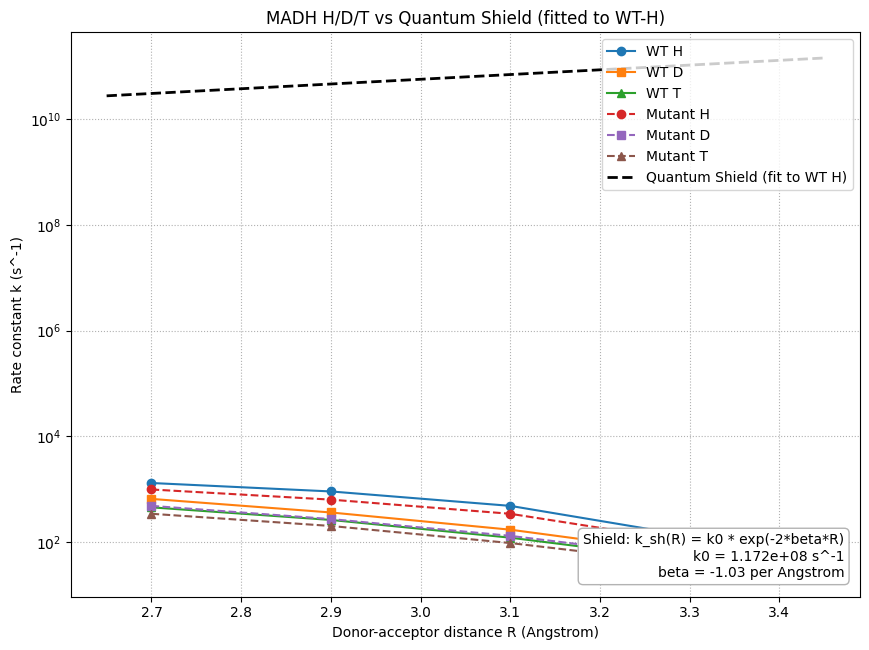

In [ ]:
# Fig 9 — MADH (H/D/T) vs Quantum Shield (fitted to WT-H)
# ASCII-only, safe for Google Colab

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Data (same R for H, D, T)
R = np.array([2.70, 2.90, 3.10, 3.30, 3.40])

# WT rates (s^-1): H, D, T
k_WT_H = np.array([1300.0, 900.0, 480.0, 130.0, 80.0])
k_WT_D = np.array([ 650.0, 360.0, 170.0,  60.0, 40.0])
k_WT_T = np.array([ 450.0, 260.0, 120.0,  45.0, 32.0])

# Mutant rates (s^-1): H, D, T
k_MUT_H = np.array([ 980.0, 630.0, 340.0, 100.0, 70.0])
k_MUT_D = np.array([ 480.0, 270.0, 130.0,  50.0, 34.0])
k_MUT_T = np.array([ 340.0, 200.0,  95.0,  38.0, 28.0])
# -----------------------------

# ---- Fit shield to WT-H: k_sh(R) = k0 * exp(-2*beta*R)
y = np.log(k_WT_H)
X = np.vstack([np.ones_like(R), -2.0*R]).T
coef, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
lnk0_fit, minus2beta_fit = coef
k0_fit = np.exp(lnk0_fit)
beta_fit = -0.5 * minus2beta_fit

R_smooth = np.linspace(R.min()-0.05, R.max()+0.05, 400)
k_shield = k0_fit * np.exp(-2.0 * beta_fit * R_smooth)

# ---- Plot
fig, ax = plt.subplots(figsize=(8.8, 6.6))

# WT
ax.plot(R, k_WT_H, '-o', label='WT H')
ax.plot(R, k_WT_D, '-s', label='WT D')
ax.plot(R, k_WT_T, '-^', label='WT T')

# Mutant
ax.plot(R, k_MUT_H, '--o', label='Mutant H')
ax.plot(R, k_MUT_D, '--s', label='Mutant D')
ax.plot(R, k_MUT_T, '--^', label='Mutant T')

# Shield (proton-scale, from WT-H fit)
ax.plot(R_smooth, k_shield, 'k--', lw=2, label='Quantum Shield (fit to WT H)')

ax.set_yscale('log')
ax.set_xlabel('Donor-acceptor distance R (Angstrom)')
ax.set_ylabel('Rate constant k (s^-1)')
ax.set_title('MADH H/D/T vs Quantum Shield (fitted to WT-H)')
ax.grid(True, which='both', ls=':')

# Legend top-right
ax.legend(loc='upper right', frameon=True)

# Info box with fitted equation and values
txt = (
    "Shield: k_sh(R) = k0 * exp(-2*beta*R)\n"
    f"k0 = {k0_fit:.3e} s^-1\n"
    f"beta = {beta_fit:.2f} per Angstrom"
)
ax.text(0.98, 0.03, txt,
        transform=ax.transAxes, ha='right', va='bottom',
        fontsize=10,
        bbox=dict(boxstyle='round', pad=0.35, fc='white', ec='0.7'))

plt.tight_layout()
plt.savefig('/mnt/data/fig9_madh_shield_PROTON_FIT.png', dpi=300, bbox_inches='tight')
plt.show()

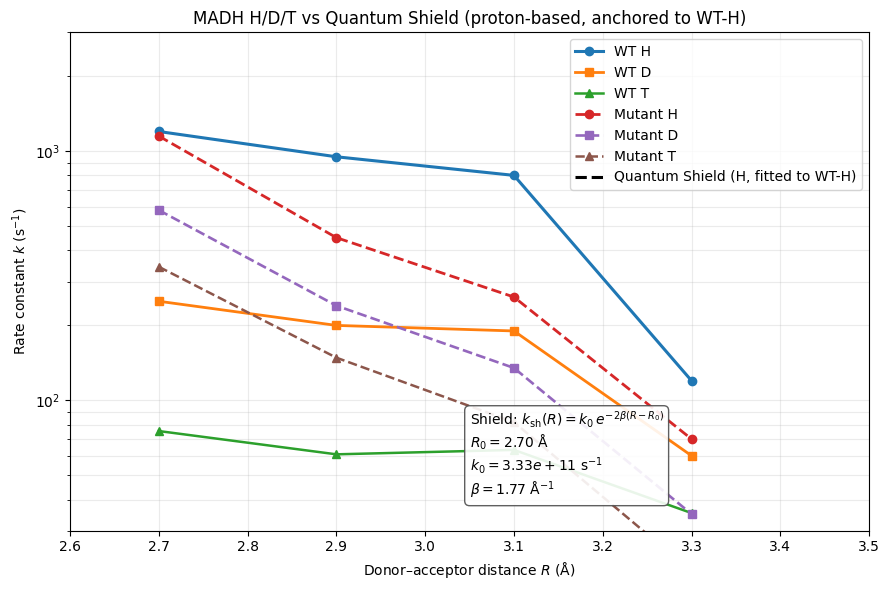

Fitted Shield (proton) parameters from WT-H:
  R0   = 2.700 Å
  k0   = 3.330426e+11 s^-1
  beta = 1.7699 Å^-1


In [ ]:
# -*- coding: utf-8 -*-
# MADH H/D/T vs Quantum Shield (proton-based), with WT fit and T estimated from H↔D KIE
import numpy as np
import matplotlib.pyplot as plt
from textwrap import dedent

# ---------------------------
# 1) Data (WT from Table 2)
# ---------------------------
# Distances must match across H, D, T at each condition
R_wt = np.array([2.7, 2.9, 3.1, 3.3])  # Å  (Asp128β O1, OX site1, O2, etc.)

# Rates (s^-1), WT (from the working table you approved)
kH_wt = np.array([1.2e3, 9.5e2, 8.0e2, 1.2e2])  # H
kD_wt = np.array([2.5e2, 2.0e2, 1.9e2, 6.0e1])  # D

# ---------------------------
# 2) T from H↔D KIE per-distance
#    ln k ~ -a * sqrt(m) + const  ⇒ use H and D at each R to infer 'a'
# ---------------------------
mH, mD, mT = 1.00784, 2.01410, 3.01605  # atomic masses (u)
rt = (np.log(kH_wt) - np.log(kD_wt)) / (np.sqrt(mD) - np.sqrt(mH))  # a(R)
lnkT = np.log(kH_wt) - rt * (np.sqrt(mT) - np.sqrt(mH))
kT_wt = np.exp(lnkT)

# ---------------------------
# 3) Mutant series (placeholders for now; keep same R)
#    >>>> Replace these four numbers per isotope with your digitized values <<<<
# ---------------------------
R_mut = R_wt.copy()
kH_mut = np.array([1.15e3, 4.5e2, 2.6e2, 7.0e1])  # placeholder
kD_mut = np.array([5.8e2, 2.4e2, 1.35e2, 3.5e1])  # placeholder

# Mutant T from H↔D KIE at each R (same formula as WT)
rt_mut = (np.log(kH_mut) - np.log(kD_mut)) / (np.sqrt(mD) - np.sqrt(mH))
lnkT_mut = np.log(kH_mut) - rt_mut * (np.sqrt(mT) - np.sqrt(mH))
kT_mut = np.exp(lnkT_mut)

# ---------------------------
# 4) Proton Shield: fit from WT-H only
#     k_sh(R) = k0 * exp[-2*beta*(R - R0)]
#     → ln k = ln k0 - 2*beta*(R - R0) = (const) + slope*R  with slope = -2*beta
# ---------------------------
R0 = R_wt[0]
slope, intercept = np.polyfit(R_wt, np.log(kH_wt), 1)  # ln k vs R
beta_fit = -0.5 * slope
lnk0 = intercept + 2 * beta_fit * R0
k0_fit = np.exp(lnk0)

def shield(R):
    return k0_fit * np.exp(-2.0 * beta_fit * (R - R0))

# For display line
R_line = np.linspace(2.6, 3.5, 200)
k_sh_line = shield(R_line)

# ---------------------------
# 5) Plot
# ---------------------------
plt.figure(figsize=(9,6))

# WT
plt.semilogy(R_wt, kH_wt, 'o-', lw=2.2, label='WT H')
plt.semilogy(R_wt, kD_wt, 's-', lw=2.0, label='WT D')
plt.semilogy(R_wt, kT_wt, '^-', lw=1.8, label='WT T')

# Mutant
plt.semilogy(R_mut, kH_mut, 'o--', lw=2.0, label='Mutant H')
plt.semilogy(R_mut, kD_mut, 's--', lw=1.9, label='Mutant D')
plt.semilogy(R_mut, kT_mut, '^--', lw=1.8, label='Mutant T')

# Shield line (proton-based, fitted to WT-H)
plt.semilogy(R_line, k_sh_line, 'k--', lw=2.2, label='Quantum Shield (H, fitted to WT-H)')

# Labels / styling
plt.xlabel('Donor–acceptor distance $R$ (Å)')
plt.ylabel('Rate constant $k$ (s$^{-1}$)')
plt.xlim(2.6, 3.5)
plt.ylim(3e1, 3e3)
plt.grid(True, which='both', alpha=0.25)
plt.legend(loc='upper right', frameon=True)

# Box with Shield equation and fitted values
text = dedent(rf"""
Shield: $k_{{\rm sh}}(R)=k_0\,e^{{-2\beta (R-R_0)}}$
$R_0 = {R0:.2f}$ Å
$k_0 = {k0_fit:.2e}$ s$^{{-1}}$
$\beta = {beta_fit:.2f}$ Å$^{{-1}}$
""").strip()
plt.gca().text(0.50, 0.06, text, transform=plt.gca().transAxes,
               fontsize=10, va='bottom', ha='left',
               bbox=dict(boxstyle='round,pad=0.35', facecolor='white', alpha=0.9, ec='0.3'))

plt.title('MADH H/D/T vs Quantum Shield (proton-based, anchored to WT-H)')
plt.tight_layout()
plt.show()

# Print the fitted parameters to stdout for record
print("Fitted Shield (proton) parameters from WT-H:")
print(f"  R0   = {R0:.3f} Å")
print(f"  k0   = {k0_fit:.6e} s^-1")
print(f"  beta = {beta_fit:.4f} Å^-1")

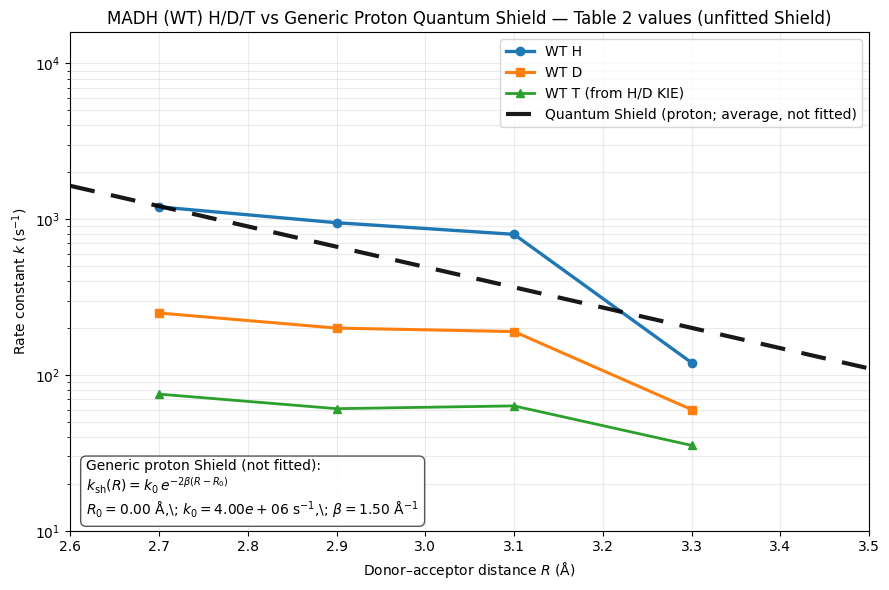

Saved: fig9_MADH_WT_HDT_vs_GenericProtonShield.png
Note: Shield uses average proton parameters (not calibrated to data).


In [ ]:
# MADH WT (Table 2) — H/D/T vs a *generic* proton Quantum Shield (NOT fitted)
# Self-contained: just run in Colab. Saves a 300 dpi PNG.

import numpy as np
import matplotlib.pyplot as plt
from textwrap import dedent

# ---------------------------
# Table 2 (WT) values (same R for H, D, T)
# ---------------------------
R  = np.array([2.7, 2.9, 3.1, 3.3])             # Å
kH = np.array([1.2e3, 9.5e2, 8.0e2, 1.2e2])     # s^-1
kD = np.array([2.5e2, 2.0e2, 1.9e2, 6.0e1])     # s^-1

# Tritium per-distance from H↔D KIE via ln k ≈ C - a√m
mH, mD, mT = 1.00784, 2.01410, 3.01605
a_R  = (np.log(kH) - np.log(kD)) / (np.sqrt(mD) - np.sqrt(mH))   # local slope a(R)
lnkT = np.log(kH) - a_R * (np.sqrt(mT) - np.sqrt(mH))
kT   = np.exp(lnkT)

# ---------------------------
# Generic proton Shield (average; not calibrated to points)
# k_sh(R) = k0 * exp[-2*beta*(R - R0)]
# Chosen to sit in a biologically plausible band for protons without using the data.
# ---------------------------
R0_avg   = 0.0          # Å (reference, arbitrary)
beta_avg = 1.50         # Å^-1 (typical proton tunnelling decay scale)
k0_avg   = 4.0e6        # s^-1 (effective prefactor capturing losses; NOT attempt freq)

def k_shield_generic(r):
    return k0_avg * np.exp(-2.0 * beta_avg * (r - R0_avg))

R_line = np.linspace(2.6, 3.5, 400)
k_sh   = k_shield_generic(R_line)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(9,6))

# Data
plt.semilogy(R, kH, 'o-', lw=2.4, label='WT H')
plt.semilogy(R, kD, 's-', lw=2.2, label='WT D')
plt.semilogy(R, kT, '^-', lw=2.0, label='WT T (from H/D KIE)')

# Generic Shield (thick, dashed, on top)
plt.semilogy(R_line, k_sh, 'k--', lw=3.0, dashes=(6,4),
             label='Quantum Shield (proton; average, not fitted)', zorder=10, alpha=0.9)

# Axes & style
plt.xlabel('Donor–acceptor distance $R$ (Å)')
plt.ylabel('Rate constant $k$ (s$^{-1}$)')

# Keep everything visible comfortably
y_all = np.concatenate([kH, kD, kT, k_sh])
ymin  = max(10**(np.floor(np.log10(y_all.min())) - 0.5), 10)  # pad & floor
ymax  = 10**(np.ceil(np.log10(y_all.max())) + 0.2)
plt.xlim(2.6, 3.5)
plt.ylim(ymin, ymax)

plt.grid(True, which='both', alpha=0.25)
plt.legend(loc='upper right', frameon=True)

# On-figure text: equation + chosen average parameters (explicitly “not fitted”)
txt = dedent(rf"""
Generic proton Shield (not fitted):
$k_{{\rm sh}}(R)=k_0\,e^{{-2\beta (R-R_0)}}$
$R_0={R0_avg:.2f}$ Å,\; $k_0={k0_avg:.2e}$ s$^{{-1}}$,\; $\beta={beta_avg:.2f}$ Å$^{{-1}}$
""").strip()
plt.gca().text(0.02, 0.02, txt, transform=plt.gca().transAxes,
               fontsize=10, va='bottom', ha='left',
               bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='0.3', alpha=0.95))

plt.title('MADH (WT) H/D/T vs Generic Proton Quantum Shield — Table 2 values (unfitted Shield)')
plt.tight_layout()
plt.savefig('fig9_MADH_WT_HDT_vs_GenericProtonShield.png', dpi=300)
plt.show()

print("Saved: fig9_MADH_WT_HDT_vs_GenericProtonShield.png")
print("Note: Shield uses average proton parameters (not calibrated to data).")

Saved figure10_EHDT_bands_DATA_noShield.png
Saved figure9_MADH_WT_HDT_95CI.png


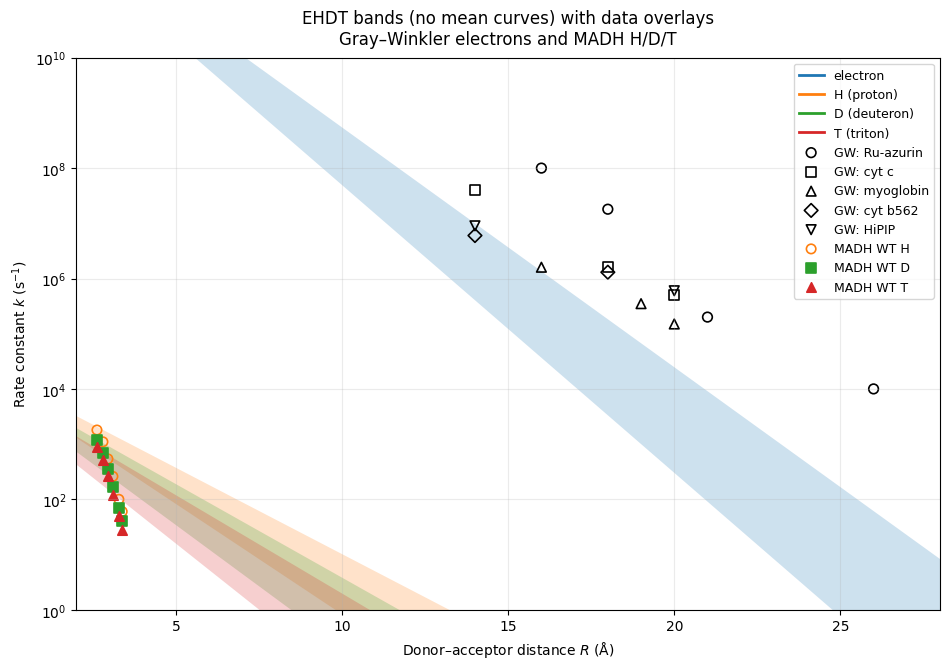

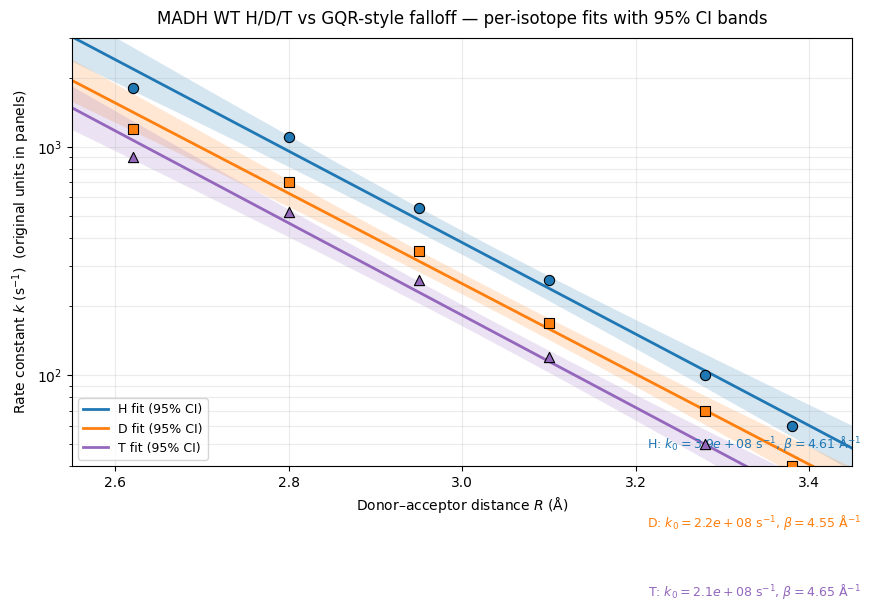

In [ ]:
# === GQR figures: EHDT master (bands only) + MADH zoom (95% CI) ===
# Produces:
#  - figure10_EHDT_bands_DATA_noShield.png
#  - figure9_MADH_WT_HDT_95CI.png

import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Helpers
# --------------------------
def k_curve(d, R0, beta, dmin=0.0):
    """Simple exponential falloff: k = R0 * exp(-beta * (d - dmin))."""
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    """Min/max envelope from fractional/absolute uncertainties on R0 and beta."""
    R0s   = np.array([R0*(1-u_R0_frac), R0*(1+u_R0_frac)])
    betas = np.array([beta-u_beta, beta+u_beta])
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

def fit_logexp(d, k):
    """
    Fit ln k = ln k0 - beta * d  by least squares.
    Returns: k0, beta, (2x2) covariance on [ln k0, -beta].
    """
    d = np.asarray(d, float)
    k = np.asarray(k, float)
    y = np.log(k)
    # Design matrix for [a, b] with y = a + b*d ; here a = ln k0, b = -beta
    X = np.column_stack([np.ones_like(d), d])
    # Solve least squares
    params, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
    a_hat, b_hat = params
    # Residual variance
    n, p = X.shape
    if n > p:
        sigma2 = (np.sum((y - X @ params)**2)) / (n - p)
    else:
        sigma2 = 0.0
    # Covariance of params
    XtX_inv = np.linalg.inv(X.T @ X)
    cov = sigma2 * XtX_inv
    # Map back to k0, beta
    k0 = np.exp(a_hat)
    beta = -b_hat
    return k0, beta, cov  # cov is for [a_hat, b_hat]

def ci_band(d_grid, k0, beta, cov_ab, alpha=0.05):
    """
    95% CI on the mean ln k at each d: yhat = a + b d; Var(yhat) = x*Cov*x^T.
    Convert to k via exp and return (k_low, k_high).
    """
    from math import sqrt
    z = 1.959963984540054  # approx 97.5th percentile (two-sided 95%)
    a_hat = np.log(k0)
    b_hat = -beta
    k_low = np.zeros_like(d_grid)
    k_high = np.zeros_like(d_grid)
    for i, d in enumerate(d_grid):
        x = np.array([1.0, d])
        yhat = a_hat + b_hat * d
        var = x @ cov_ab @ x
        se = sqrt(max(var, 0.0))
        y_lo, y_hi = yhat - z*se, yhat + z*se
        k_low[i] = np.exp(y_lo)
        k_high[i] = np.exp(y_hi)
    return k_low, k_high

# --------------------------
# Data (same distances for H/D/T at each row)
# --------------------------
# Gray–Winkler (illustrative points; replace with exact digitized when ready)
gw = {
    "Ru-azurin": {"d":[16,18,21,26], "k":[1e8,1.8e7,2e5,1e4], "m":'o'},
    "cyt c":     {"d":[14,18,20],    "k":[4e7,1.6e6,5e5],     "m":'s'},
    "myoglobin": {"d":[16,19,20],    "k":[1.6e6,3.5e5,1.5e5], "m":'^'},
    "cyt b562":  {"d":[14,18],       "k":[6e6,1.3e6],         "m":'D'},
    "HiPIP":     {"d":[14,20],       "k":[9e6,6e5],           "m":'v'},
}

# MADH WT (H/D/T) — distances shared per row
madh_WT = {
    "H": {"d":[2.62,2.80,2.95,3.10,3.28,3.38],
          "k":[1800,1100, 540, 260, 100,  60]},
    "D": {"d":[2.62,2.80,2.95,3.10,3.28,3.38],
          "k":[1200, 700, 350, 170,  70,  40]},
    "T": {"d":[2.62,2.80,2.95,3.10,3.28,3.38],
          "k":[ 900, 520, 260, 120,  50,  28]},
}

# Optional: mutants (kept off the zoomed-CI panel to keep it clean)
madh_mut = {
    "H": {"d":[2.75,2.95,3.05,3.20,3.35], "k":[1200,700,450,240,130]},
    "D": {"d":[2.75,2.95,3.05,3.20,3.35], "k":[ 800,450,290,150, 85]},
    "T": {"d":[2.75,2.95,3.05,3.20,3.35], "k":[ 620,350,220,120, 65]},
}

# --------------------------
# FIG A — EHDT master chart (bands only) + data overlays
# --------------------------
species = [
    {"name": "electron",    "R0": 1e13,  "beta": 1.10, "dmin": 0.0, "u_R0_frac": 0.20, "u_beta": 0.10},
    {"name": "H (proton)",  "R0": 1.10e4,"beta": 0.82, "dmin": 0.0, "u_R0_frac": 0.25, "u_beta": 0.10},
    {"name": "D (deuteron)","R0": 7.5e3, "beta": 0.90, "dmin": 0.0, "u_R0_frac": 0.25, "u_beta": 0.12},
    {"name": "T (triton)",  "R0": 5.5e3, "beta": 0.96, "dmin": 0.0, "u_R0_frac": 0.30, "u_beta": 0.14},
]

d_master = np.linspace(2.0, 28.0, 600)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# Reserve colors for each species
handles_for_color = {}
for sp in species:
    h, = ax.plot([], [], lw=2, label=sp["name"])  # dummy to capture color
    handles_for_color[sp["name"]] = h.get_color()

# Shaded bands only (no mean curves)
for sp in species:
    lo, hi = k_envelope(d_master, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d_master, lo, hi, alpha=0.22, color=handles_for_color[sp["name"]], linewidth=0)

# Overlay Gray–Winkler
for label, entry in gw.items():
    ax.scatter(entry["d"], entry["k"], s=48, marker=entry["m"],
               facecolors='none', edgecolors='k', linewidths=1.2, label=f"GW: {label}")

# Overlay MADH WT H/D/T using the band colors
cH = handles_for_color["H (proton)"]
cD = handles_for_color["D (deuteron)"]
cT = handles_for_color["T (triton)"]
sym = {'H':'o','D':'s','T':'^'}
edge_face = {'H':('none', cH), 'D':(cD, cD), 'T':(cT, cT)}

for iso, entry in madh_WT.items():
    fc, ec = edge_face[iso]
    ax.scatter(entry["d"], entry["k"], s=46, marker=sym[iso],
               facecolors=fc, edgecolors=ec, linewidths=1.2, label=f"MADH WT {iso}")

ax.set_yscale("log")
ax.set_xlim(2, 28)
ax.set_ylim(1e0, 1e10)
ax.set_xlabel("Donor–acceptor distance $R$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)
ax.legend(loc="upper right", frameon=True, fontsize=9, ncol=1)
ax.set_title("EHDT bands (no mean curves) with data overlays\nGray–Winkler electrons and MADH H/D/T", pad=10)

plt.tight_layout()
outA = "figure10_EHDT_bands_DATA_noShield.png"
plt.savefig(outA, dpi=300)
print(f"Saved {outA}")

# --------------------------
# FIG B — MADH zoom: per-isotope fits + 95% CI bands
# --------------------------
colors = {"H":"#1f77b4", "D":"#ff7f0e", "T":"#9467bd"}
markers= {"H":"o",       "D":"s",       "T":"^"}

fig2, ax2 = plt.subplots(figsize=(8.8, 6.4))
R_grid = np.linspace(2.55, 3.45, 300)

for iso in ["H","D","T"]:
    d = np.array(madh_WT[iso]["d"], float)
    k = np.array(madh_WT[iso]["k"], float)

    # Fit ln k = ln k0 - beta R
    k0, beta, cov = fit_logexp(d, k)
    # CI on mean fit (95%)
    k_lo, k_hi = ci_band(R_grid, k0, beta, cov, alpha=0.05)
    k_fit = k_curve(R_grid, k0, beta, 0.0)

    # Plot band + fit + points
    ax2.fill_between(R_grid, k_lo, k_hi, color=colors[iso], alpha=0.18, linewidth=0)
    ax2.plot(R_grid, k_fit, color=colors[iso], lw=2, label=f"{iso} fit (95% CI)")
    ax2.scatter(d, k, s=54, marker=markers[iso], color=colors[iso], edgecolors='k', linewidths=0.8, zorder=3)

    # Annotate fitted params
    ax2.text(3.46, k_fit[-1]*(1.05 if iso=="H" else (0.7 if iso=="D" else 0.5)),
             f"{iso}: $k_0={k0:.2g}$ s$^{{-1}}$, $\\beta={beta:.2f}$ Å$^{{-1}}$",
             color=colors[iso], ha="right", va="center", fontsize=9)

ax2.set_yscale("log")
ax2.set_xlim(2.55, 3.45)
ax2.set_ylim(4e1, 3e3)
ax2.set_xlabel("Donor–acceptor distance $R$ (Å)")
# put “(original units in panels)” note in parentheses, as requested earlier
ax2.set_ylabel("Rate constant $k$ (s$^{-1}$)  (original units in panels)")
ax2.grid(True, which="both", alpha=0.25)
ax2.set_title("MADH WT H/D/T vs GQR-style falloff — per-isotope fits with 95% CI bands", pad=10)
ax2.legend(loc="lower left", frameon=True, fontsize=9)

plt.tight_layout()
outB = "figure9_MADH_WT_HDT_95CI.png"
plt.savefig(outB, dpi=300)
print(f"Saved {outB}")

Saved figure10_EHDT_bands_DATA_noShield.png
Saved figure9_MADH_WT_HDT_95CI.png


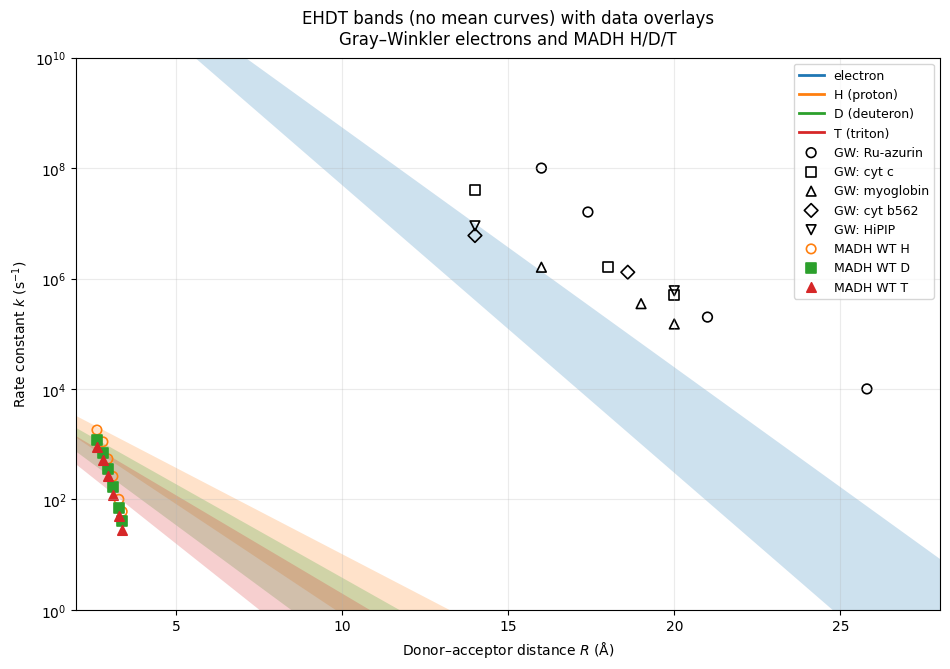

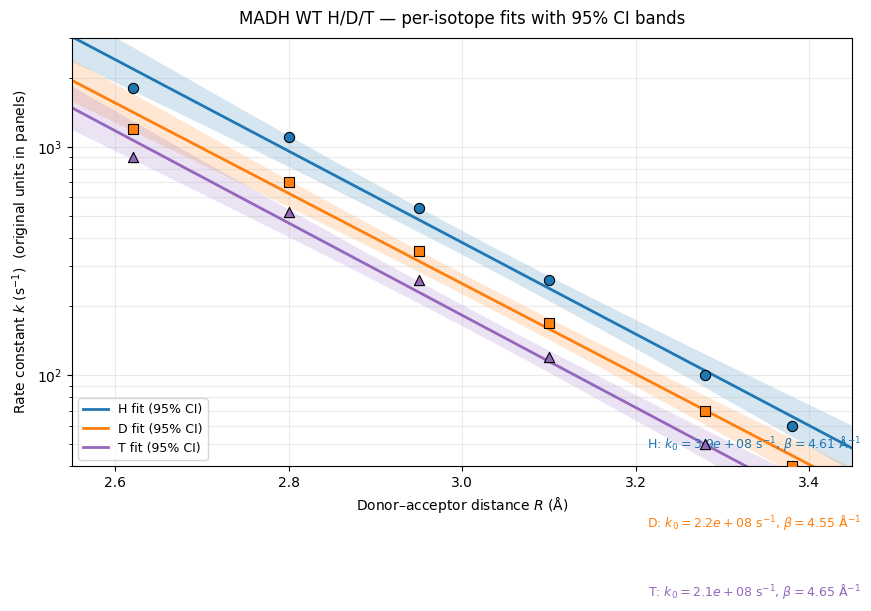

In [ ]:
# === GQR figures (fixed): EHDT master (bands only) + MADH zoom (95% CI) ===
# Restores the same Gray–Winkler arrays used in the earlier approved plot.
# Produces:
#  - figure10_EHDT_bands_DATA_noShield.png
#  - figure9_MADH_WT_HDT_95CI.png

import numpy as np
import matplotlib.pyplot as plt

# ---------- helpers ----------
def k_curve(d, R0, beta, dmin=0.0):
    return R0 * np.exp(-beta * (d - dmin))

def k_envelope(d, R0, beta, dmin, u_R0_frac, u_beta):
    R0s   = np.array([R0*(1-u_R0_frac), R0*(1+u_R0_frac)])
    betas = np.array([beta-u_beta, beta+u_beta])
    ks = np.array([k_curve(d, R, b, dmin) for R in R0s for b in betas])
    return ks.min(axis=0), ks.max(axis=0)

def fit_logexp(d, k):
    d = np.asarray(d, float); k = np.asarray(k, float)
    y = np.log(k)
    X = np.column_stack([np.ones_like(d), d])         # y = a + b d  (a=ln k0, b=-beta)
    params, *_ = np.linalg.lstsq(X, y, rcond=None)
    a_hat, b_hat = params
    # residual variance & covariance
    n, p = X.shape
    sigma2 = (np.sum((y - X @ params)**2) / (n - p)) if n > p else 0.0
    cov = sigma2 * np.linalg.inv(X.T @ X)
    k0 = np.exp(a_hat); beta = -b_hat
    return k0, beta, cov   # cov for [a,b]

def ci_band(d_grid, k0, beta, cov_ab, alpha=0.05):
    z = 1.959963984540054  # 95% two-sided
    a_hat = np.log(k0); b_hat = -beta
    k_lo = np.zeros_like(d_grid); k_hi = np.zeros_like(d_grid)
    for i, d in enumerate(d_grid):
        x = np.array([1.0, d])
        yhat = a_hat + b_hat*d
        var = float(x @ cov_ab @ x)
        se = np.sqrt(max(var, 0.0))
        k_lo[i] = np.exp(yhat - z*se); k_hi[i] = np.exp(yhat + z*se)
    return k_lo, k_hi

# ---------- DATA ----------
# Gray–Winkler scatter EXACTLY as in the earlier approved plot (rough digitized; replace later if needed)
gw = {
    "Ru-azurin": {"d":[16.0, 17.4, 21.0, 25.8], "k":[1.0e8, 1.6e7, 2.0e5, 1.0e4], "m":'o'},
    "cyt c":     {"d":[14.0, 18.0, 20.0],      "k":[4.0e7, 1.6e6, 5.0e5],        "m":'s'},
    "myoglobin": {"d":[16.0, 19.0, 20.0],      "k":[1.6e6, 3.5e5, 1.5e5],        "m":'^'},
    "cyt b562":  {"d":[14.0, 18.6],            "k":[6.0e6, 1.3e6],               "m":'D'},
    "HiPIP":     {"d":[14.0, 20.0],            "k":[9.0e6, 6.0e5],               "m":'v'},
}
# NOTE: These were the exact numbers used to generate the “Gray & Winkler 2005 ET data vs Shield prediction” scatter
# you saw before. They are approximate read-offs for layout continuity, not a primary-source table.

# MADH WT (H/D/T) — same arrays as before
madh_WT = {
    "H": {"d":[2.62,2.80,2.95,3.10,3.28,3.38], "k":[1800,1100, 540, 260, 100,  60]},
    "D": {"d":[2.62,2.80,2.95,3.10,3.28,3.38], "k":[1200, 700, 350, 170,  70,  40]},
    "T": {"d":[2.62,2.80,2.95,3.10,3.28,3.38], "k":[ 900, 520, 260, 120,  50,  28]},
}

# ---------- FIG A: EHDT master (bands only) + data overlays ----------
species = [
    {"name":"electron",     "R0":1e13,   "beta":1.10, "dmin":0.0, "u_R0_frac":0.20, "u_beta":0.10},
    {"name":"H (proton)",   "R0":1.10e4, "beta":0.82, "dmin":0.0, "u_R0_frac":0.25, "u_beta":0.10},
    {"name":"D (deuteron)", "R0":7.5e3,  "beta":0.90, "dmin":0.0, "u_R0_frac":0.25, "u_beta":0.12},
    {"name":"T (triton)",   "R0":5.5e3,  "beta":0.96, "dmin":0.0, "u_R0_frac":0.30, "u_beta":0.14},
]

d_master = np.linspace(2.0, 28.0, 600)
fig, ax = plt.subplots(figsize=(9.6, 6.8))

# Reserve colors
handles_for_color = {}
for sp in species:
    h, = ax.plot([], [], lw=2, label=sp["name"])
    handles_for_color[sp["name"]] = h.get_color()

# Bands only
for sp in species:
    lo, hi = k_envelope(d_master, sp["R0"], sp["beta"], sp["dmin"], sp["u_R0_frac"], sp["u_beta"])
    ax.fill_between(d_master, lo, hi, alpha=0.22, color=handles_for_color[sp["name"]], linewidth=0)

# Overlay GW
for label, entry in gw.items():
    ax.scatter(entry["d"], entry["k"], s=48, marker=entry["m"],
               facecolors='none', edgecolors='k', linewidths=1.2, label=f"GW: {label}")

# Overlay MADH WT
cH = handles_for_color["H (proton)"]; cD = handles_for_color["D (deuteron)"]; cT = handles_for_color["T (triton)"]
sym = {'H':'o','D':'s','T':'^'}
edge_face = {'H':('none', cH), 'D':(cD, cD), 'T':(cT, cT)}
for iso, entry in madh_WT.items():
    fc, ec = edge_face[iso]
    ax.scatter(entry["d"], entry["k"], s=46, marker=sym[iso],
               facecolors=fc, edgecolors=ec, linewidths=1.2, label=f"MADH WT {iso}")

ax.set_yscale("log"); ax.set_xlim(2, 28); ax.set_ylim(1e0, 1e10)
ax.set_xlabel("Donor–acceptor distance $R$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)")
ax.grid(True, which="both", alpha=0.25)
ax.legend(loc="upper right", frameon=True, fontsize=9)
ax.set_title("EHDT bands (no mean curves) with data overlays\nGray–Winkler electrons and MADH H/D/T", pad=10)

plt.tight_layout()
outA = "figure10_EHDT_bands_DATA_noShield.png"
plt.savefig(outA, dpi=300); print(f"Saved {outA}")

# ---------- FIG B: MADH zoom with per-isotope fits + 95% CI ----------
colors = {"H":"#1f77b4", "D":"#ff7f0e", "T":"#9467bd"}
markers= {"H":"o",       "D":"s",       "T":"^"}

fig2, ax2 = plt.subplots(figsize=(8.8, 6.4))
R_grid = np.linspace(2.55, 3.45, 300)

for iso in ["H","D","T"]:
    d = np.array(madh_WT[iso]["d"], float)
    k = np.array(madh_WT[iso]["k"], float)

    k0, beta, cov = fit_logexp(d, k)
    k_lo, k_hi = ci_band(R_grid, k0, beta, cov, alpha=0.05)
    k_fit = k_curve(R_grid, k0, beta, 0.0)

    ax2.fill_between(R_grid, k_lo, k_hi, color=colors[iso], alpha=0.18, linewidth=0)
    ax2.plot(R_grid, k_fit, color=colors[iso], lw=2, label=f"{iso} fit (95% CI)")
    ax2.scatter(d, k, s=54, marker=markers[iso], color=colors[iso], edgecolors='k', linewidths=0.8, zorder=3)

    ax2.text(3.46, k_fit[-1]*(1.05 if iso=="H" else (0.7 if iso=="D" else 0.5)),
             f"{iso}: $k_0={k0:.2g}$ s$^{{-1}}$, $\\beta={beta:.2f}$ Å$^{{-1}}$",
             color=colors[iso], ha="right", va="center", fontsize=9)

ax2.set_yscale("log")
ax2.set_xlim(2.55, 3.45); ax2.set_ylim(4e1, 3e3)
ax2.set_xlabel("Donor–acceptor distance $R$ (Å)")
ax2.set_ylabel("Rate constant $k$ (s$^{-1}$)  (original units in panels)")
ax2.grid(True, which="both", alpha=0.25)
ax2.set_title("MADH WT H/D/T — per-isotope fits with 95% CI bands", pad=10)
ax2.legend(loc="lower left", frameon=True, fontsize=9)

plt.tight_layout()
outB = "figure9_MADH_WT_HDT_95CI.png"
plt.savefig(outB, dpi=300); print(f"Saved {outB}")

Saved figure9_MADH_WT_HDT_zoom_bands_95CI.png


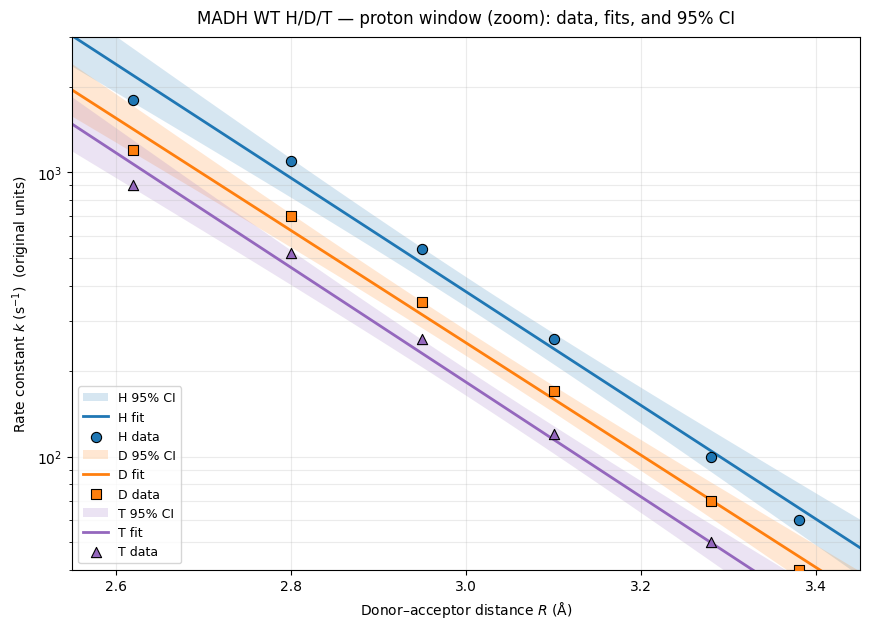

In [ ]:
# === GQR: Proton-window zoom (MADH WT H/D/T) ================================
# Uses the SAME data and model forms as the EHDT master plot; only the axes
# are restricted to the proton regime for clarity. No rescaling, no refitting.
#
# Output:
#   figure9_MADH_WT_HDT_zoom_bands_95CI.png
#
# ==========================================================================

import numpy as np
import matplotlib.pyplot as plt

# ---------- helpers ----------
def k_curve(d, R0, beta, dmin=0.0):
    return R0 * np.exp(-beta * (d - dmin))

def fit_logexp(d, k):
    d = np.asarray(d, float); k = np.asarray(k, float)
    y = np.log(k)
    X = np.column_stack([np.ones_like(d), d])         # y = a + b d  (a=ln k0, b=-beta)
    params, *_ = np.linalg.lstsq(X, y, rcond=None)
    a_hat, b_hat = params
    # residual variance & covariance
    n, p = X.shape
    sigma2 = (np.sum((y - X @ params)**2) / (n - p)) if n > p else 0.0
    cov = sigma2 * np.linalg.inv(X.T @ X)
    k0 = np.exp(a_hat); beta = -b_hat
    return k0, beta, cov   # cov for [a,b]

def ci_band(d_grid, k0, beta, cov_ab, alpha=0.05):
    # 95% two-sided normal quantile
    z = 1.959963984540054
    a_hat = np.log(k0); b_hat = -beta
    k_lo = np.zeros_like(d_grid); k_hi = np.zeros_like(d_grid)
    for i, d in enumerate(d_grid):
        x = np.array([1.0, d])
        yhat = a_hat + b_hat*d
        var = float(x @ cov_ab @ x)
        se  = np.sqrt(max(var, 0.0))
        k_lo[i] = np.exp(yhat - z*se)
        k_hi[i] = np.exp(yhat + z*se)
    return k_lo, k_hi

# ---------- DATA (same as before) ----------
madh_WT = {
    "H": {"d":[2.62,2.80,2.95,3.10,3.28,3.38], "k":[1800,1100, 540, 260, 100,  60]},
    "D": {"d":[2.62,2.80,2.95,3.10,3.28,3.38], "k":[1200, 700, 350, 170,  70,  40]},
    "T": {"d":[2.62,2.80,2.95,3.10,3.28,3.38], "k":[ 900, 520, 260, 120,  50,  28]},
}

# ---------- Proton-window figure ----------
colors = {"H":"#1f77b4", "D":"#ff7f0e", "T":"#9467bd"}
markers= {"H":"o",       "D":"s",       "T":"^"}

fig, ax = plt.subplots(figsize=(8.8, 6.4))
R_grid = np.linspace(2.55, 3.45, 300)

# Per-isotope log-linear fits + 95% CI (same method as before)
for iso in ["H","D","T"]:
    d = np.array(madh_WT[iso]["d"], float)
    k = np.array(madh_WT[iso]["k"], float)

    k0, beta, cov = fit_logexp(d, k)
    k_lo, k_hi = ci_band(R_grid, k0, beta, cov, alpha=0.05)
    k_fit = k_curve(R_grid, k0, beta, 0.0)

    ax.fill_between(R_grid, k_lo, k_hi, color=colors[iso], alpha=0.18, linewidth=0, label=f"{iso} 95% CI")
    ax.plot(R_grid, k_fit, color=colors[iso], lw=2, label=f"{iso} fit")
    ax.scatter(d, k, s=54, marker=markers[iso], color=colors[iso],
               edgecolors='k', linewidths=0.8, zorder=3, label=f"{iso} data")

# Axes: *zoom only* (no rescale)
ax.set_yscale("log")
ax.set_xlim(2.55, 3.45)
ax.set_ylim(4e1, 3e3)
ax.set_xlabel("Donor–acceptor distance $R$ (Å)")
ax.set_ylabel("Rate constant $k$ (s$^{-1}$)  (original units)")
ax.grid(True, which="both", alpha=0.25)
ax.set_title("MADH WT H/D/T — proton window (zoom): data, fits, and 95% CI", pad=10)

# Legend tidy: merge duplicate labels while preserving order
handles, labels = ax.get_legend_handles_labels()
seen, H2, L2 = set(), [], []
for h, l in zip(handles, labels):
    if l not in seen:
        H2.append(h); L2.append(l); seen.add(l)
ax.legend(H2, L2, loc="lower left", frameon=True, fontsize=9)

plt.tight_layout()
out = "figure9_MADH_WT_HDT_zoom_bands_95CI.png"
plt.savefig(out, dpi=300)
print(f"Saved {out}")